<b><font size="6">Data Mining I Project</font><a class="anchor"><a id='toc'></a></b><br>
-- Students Mental Health --

# <font color='#BFD72F'>1. Libraries</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#path = '/content/drive/MyDrive/1. PROYECTOS/DM project/'

# <font color='#BFD72F'>2. Data</font>

In [3]:
# @title Importing the Dataset

data = pd.read_csv("G:/Mi unidad/1. PROYECTOS/DM project/students_mental_health.csv", index_col = 0)

In [4]:
# @title Number of Rows & Columns

data.shape

(11336, 29)

In [5]:
# @title Overview

data.head(10)

gender   age date_of_birth  university   degree_level  degree_major  \
id                                                                        
1     Male  21.0    2006-02-25  University  Undergraduate   Engineering   
2     Male  20.0    2005-07-16  University  Undergraduate   Engineering   
3     Male  19.0    1990-10-16  University  Undergraduate  Data Science   
4     Male  20.0    2007-10-18  University  Undergraduate  Data Science   
5   Female  19.0    2009-11-28  University  Undergraduate  Data Science   
6   Female  19.0    1999-05-15  University  Undergraduate  Data Science   
7     Male  20.0    1996-04-19  University  Undergraduate  Data Science   
8     Male  18.0    2001-05-27  University  Undergraduate  Data Science   
9     Male  20.0    1991-02-10  University  Undergraduate           NaN   
10     NaN   NaN           NaN         NaN            NaN           NaN   

    academic_year  grade residential_status campus_discrimination  ...  \
id                                                                 ...   
1             1.0   54.0         Off-Campus                   Yes  ...   
2             3.0   90.0          On-Campus                    No  ...   
3             1.0   79.0         Off-Campus                    No  ...   
4             3.0   88.0         Off-Campus                   Yes  ...   
5             1.0   76.0         Off-Campus                   Yes  ...   
6             1.0   65.0         Off-Campus                    No  ...   
7             1.0   81.0         Off-Campus                    No  ...   
8             1.0   66.0         Off-Campus                    No  ...   
9             4.0   94.0         Off-Campus                   Yes  ...   
10            NaN    NaN                NaN                   NaN  ...   

   isolation future_insecurity  sleep  outdoor_activities  \
id                                                          
1      100.0             100.0    0.0                 0.0   
2       52.0              52.0    1.0                 0.0   
3       96.0               0.0    0.0                 0.0   
4      100.0              35.0    0.0                 0.0   
5        5.0              55.0    0.0                 0.0   
6       85.0              85.0    0.0                 0.0   
7      100.0               3.0    0.0                 0.0   
8       85.0              35.0    0.0                 1.0   
9      100.0             100.0    0.0                 0.0   
10       NaN               NaN    NaN                 NaN   

    religious_activities  sports  consume_food  creative_activities  \
id                                                                    
1                    0.0     0.0           0.0                  0.0   
2                    1.0     9.0           0.0                  0.0   
3                    1.0     8.0           0.0                  0.0   
4                    0.0     7.0           0.0                  0.0   
5                    1.0     7.0           0.0                  0.0   
6                    0.0     6.0           0.0                  1.0   
7                    1.0     8.0           0.0                  0.0   
8                    0.0     1.0           0.0                  1.0   
9                    1.0     1.0           0.0                  1.0   
10                   NaN     NaN           NaN                  NaN   

    social_activities  online_entertainment  
id                                           
1                 0.0                   1.0  
2                 1.0                   1.0  
3                 0.0                   0.0  
4                 0.0                   1.0  
5                 1.0                   1.0  
6                 0.0                   0.0  
7                 0.0                   0.0  
8                 0.0                   1.0  
9                 0.0                   1.0  
10                NaN                   NaN  

[10 rows x 29 columns]

In [6]:
# Creation of 'unique_key' column as a identifier for each student

data['unique_key'] = data.apply(lambda x: '_'.join(x.astype(str)), axis=1)

**Observation:**

1 line is immediately identified as containing only missing values (line 10). Could there be more?

In [7]:
data['unique_key'].duplicated().sum()

np.int64(199)

In [8]:
# @title Descriptive Statistics

data.describe().T

count       mean        std   min   25%   50%   75%  \
age                   11136.0  19.948366   1.779424  17.0  19.0  20.0  21.0   
academic_year         11136.0   2.160920   1.070804   1.0   1.0   2.0   3.0   
grade                 11136.0  77.279723  12.152864  50.0  70.0  79.0  87.0   
study_satisfaction    10590.0  72.071577  25.269816   0.0  56.0  77.0  95.0   
academic_workload     11136.0  71.177083  21.549068  10.0  58.0  73.0  88.0   
academic_pressure     11136.0  68.632094  27.358696   0.0  53.0  74.0  90.0   
financial_concerns    11136.0  59.195312  33.422726   0.0  36.0  62.0  90.0   
social_relationships  11136.0  45.063757  28.746581   0.0  19.0  46.0  64.0   
depression            10559.0  55.077375  32.704507   0.0  29.0  59.0  86.0   
anxiety               10550.0  55.183791  31.366781   0.0  30.0  60.0  84.0   
isolation             11136.0  55.648707  33.597036   0.0  28.0  60.0  87.0   
future_insecurity     11136.0  50.295348  33.152966   0.0  20.0  50.0  81.0   
sleep                 11136.0   0.229885   0.420778   0.0   0.0   0.0   0.0   
outdoor_activities    11136.0   0.218391   0.413173   0.0   0.0   0.0   0.0   
religious_activities  11136.0   0.528736   0.499196   0.0   0.0   1.0   1.0   
sports                11136.0   3.077407   3.335448   0.0   0.0   1.0   6.0   
consume_food          11136.0   0.000000   0.000000   0.0   0.0   0.0   0.0   
creative_activities   11136.0   0.114943   0.318967   0.0   0.0   0.0   0.0   
social_activities     11136.0   0.379310   0.485237   0.0   0.0   0.0   1.0   
online_entertainment  11136.0   0.425287   0.494409   0.0   0.0   0.0   1.0   

                        max  
age                    26.0  
academic_year           4.0  
grade                  95.0  
study_satisfaction    100.0  
academic_workload     100.0  
academic_pressure     100.0  
financial_concerns    100.0  
social_relationships  100.0  
depression            100.0  
anxiety               100.0  
isolation             100.0  
future_insecurity     100.0  
sleep                   1.0  
outdoor_activities      1.0  
religious_activities    1.0  
sports                 10.0  
consume_food            0.0  
creative_activities     1.0  
social_activities       1.0  
online_entertainment    1.0

In [9]:
#summary_stats = data.describe().T[['mean', 'std', 'min', 'max']]
#summary_stats.plot(kind='bar', figsize=(14,8))
#plt.title("Summary Statistics for Numerical Features")
#plt.ylabel("Value")
#plt.show()

**First impressions when looking at Descriptive Statistics:**



* `academic_workload`and `academic_pressure` have high means, which suggests that students experience considerable stress related to their studies



*   more “direct” indicators of mental health, such as `depression`, `anxiety` and `isolation` also have high averages (above 50%), which indicates significant mental health concerns



*   With `financial_concerns` averaging around 59 and `future_insecurity` at about 50, financial stress and anxiety about future prospects are common




*   there is little engagement by students in activities such as `sports` as a way of cooperating with mental health




*   Generally speaking, we can see that, for most of the variables, they show a **skewed distribution** (mean != median)


# <font color='#BFD72F'>3. Data Preprocessing</font>

In [10]:
# @title Checking for Incoherencies

*Possible Incoherencies:*

*   `age` > 100 || `age` < 17
*   `age` != `date_of_birth`
*   `academic_year ` < 1 || `academic_year` > 4
*   `grade` < 50 || `grade` > 100
*   `study_satisfaction` < 0 || `study_satisfaction` > 100
*   `academic_workload` < 0 || `academic_workload` > 100
*   `academic_pressure` < 0 || `academic_pressure` > 100
*   `financial_concerns` < 0 || `financial_concerns` > 100
*   `social_relationships`< 0 || `social_relationships` > 100
*   `depression` < 0 || `depression` > 100
*   `anxiety` < 0 || `anxiety` > 100
*   `isolation` < 0 || `isolation` > 100
*   `future_insecurity` < 0 || `future_insecurity` > 100
*   `average_sleep` < 0 || `average_sleep` > 24
*  unique values de `university`
*  unique values de `degree_level`
*  unique values de `degree_major`
*  unique values de `residential_status`









In [11]:
#data.columns

**1)** Checking `age`:

In [12]:
#data[data['age']>100]

In [13]:
#data[data['age']<17]

**2)** Checking `date_of_birth`:

In [14]:
#checking_age = data.copy()

#from datetime import datetime

#checking_age['date_of_birth'] = pd.to_datetime(checking_age['date_of_birth'], errors='coerce')

# Calculate age from 'date_of_birth' and compare it with the 'age' variable
#current_year = datetime.now().year
#checking_age['calculated_age'] = current_year - checking_age['date_of_birth'].dt.year

# Check for inconsistencies
#inconsistencies = checking_age[checking_age['age'] != checking_age['calculated_age']]

#columns = ['age', 'date_of_birth', 'calculated_age']
#inconsistent_rows = inconsistencies[columns]

#print(f"Number of inconsistencies: {len(inconsistent_rows)}\n")
#print("Inconsistent Rows:\n")
#print(inconsistent_rows)

In [15]:
#import matplotlib.pyplot as plt

#plt.figure(figsize=(30, 6))
#plt.hist(inconsistent_rows['calculated_age'], bins=range(0, 101, 1), edgecolor='black')
#plt.title('Distribution of Calculated Age')
#plt.xlabel('Calculated Age')
#plt.ylabel('Frequency')
#plt.xticks(range(0, 101, 1))
#plt.grid(axis='y', alpha=0.75)
#plt.show()

**Observation:**

From the ages obtained from `date_of_birth`, many of them are **under 17**, which **doesn't make sense** given that the minimum age to be a university student is 17 (almost 18).

On the other hand, **it's not relevant** to have 2 variables that, in themselves, mean the same thing (`age` and `date_of_birth`). As such, since the `age` variable has no inconsistencies (unlike the `date_of_birth` variable), only that variable will be used from now on (while `date_of_birth`, in the Variable Transformation section - found below - **will be dropped**).

**3)** Checking `academic_year`:

In [16]:
#data[(data['academic_year'] < 1)]

In [17]:
#data[(data['academic_year'] > 4)]

**4)** Checking `grade`:

In [18]:
#data[(data['grade'] < 50)]

In [19]:
#data[(data['grade'] > 100)]

**5)** Checking `study_satisfaction`:

In [20]:
#data[(data['study_satisfaction'] < 0)]

In [21]:
#data[(data['study_satisfaction'] > 100)]

**6)** Checking `academic_workload`:

In [22]:
#data[(data['academic_workload'] < 0)]

In [23]:
#data[(data['academic_workload'] > 100)]

**7)** Checking `academic_pressure`:

In [24]:
#data[(data['academic_pressure'] < 0)]

In [25]:
#data[(data['academic_pressure'] > 100)]

**8)** Checking `financial_concerns`:

In [26]:
#data[(data['financial_concerns'] < 0)]

In [27]:
#data[(data['financial_concerns'] > 100)]

**9)** Checking `social_relationships`:

In [28]:
#data[(data['social_relationships'] < 0)]

In [29]:
#data[(data['social_relationships'] > 100)]

**10)** Checking `depression`:

In [30]:
#data[(data['depression'] < 0)]

In [31]:
#data[(data['depression'] > 100)]

**11)** Checking `anxiety`:

In [32]:
#data[(data['anxiety'] < 0)]

In [33]:
#data[(data['anxiety'] > 100)]

**12)** Checking `isolation`:

In [34]:
#data[(data['isolation'] < 0)]

In [35]:
#data[(data['isolation'] > 100)]

**13)** Checking `future_insecurity`:

In [36]:
#data[(data['future_insecurity'] < 0)]

In [37]:
#data[(data['future_insecurity'] > 100)]

**14)** Checking `average_sleep`:

In [38]:
#checking_sleep = data.copy()

#checking_sleep['sleep_min'] = data['average_sleep'].str.extract(r'(\d+)-')[0].astype(float)
#checking_sleep['sleep_max'] = data['average_sleep'].str.extract(r'-(\d+)')[0].astype(float)

**Explanation:**

**.str.extract()** = Pandas function that uses “regex” (regular expressions) to extract patterns from Strings

**r'(\d+)-'** = regular expression used
*   **\d+** = 1 or more digits
*   **-** = the literal dash that appears in the column when separating the digits (the output of the column is “x-y hrs”)



---



1.   The *first* expression will extract the **number BEFORE the -**
2.   The *second* expression will extract the **number AFTER the -**










In [39]:
#checking_sleep[(checking_sleep['sleep_min'] < 0)]

In [40]:
#checking_sleep[(checking_sleep['sleep_max'] > 24)]

**Conclusions:**

All the above attributes are within the pre-established range

**15)** Checking `university`:

In [41]:
#data['university'].unique()

In [42]:
#data['university']

**Observation:**

The data only refers to 1 university:


*   drop `university`







**16)** Checking `degree_level`:

In [43]:
#data['degree_level'].unique()

In [44]:
#data['degree_level']

In [45]:
#non_undergraduate_count = data[data['degree_level'] != 'Undergraduate'].shape[0]
#print('There are' , non_undergraduate_count , 'missing values')

**Observation:**

There's only Undergratuate and then 456 missing values? Drop the missing values? Impute?


**17)** Checking `degree_major`:

In [46]:
#data['degree_major'].unique()

In [47]:
#non_degree_major_count = data[~data['degree_major'].isin(['Engineering', 'Data Science', 'Mathematics', 'Physics'])].shape[0]
#non_degree_major_count

**Observation:**

There are 728 missing values. Should they be dropped? Impute?

**18)** Checking `residential_status`:

In [48]:
#data['residential_status'].unique()

In [49]:
#non_residential_count = data[~data['residential_status'].isin(['Off-Campus', 'On-Campus'])].shape[0]
#non_residential_count

**Observation:**

There are 200 missing values. Should they be dropped?

In [50]:
# @title Values Across Variables

#df_melt = data.melt(var_name ='Variable', value_name = 'Value')
#g = sns.FacetGrid(df_melt, col="Variable", col_wrap = 4, sharex = False, sharey = False)
#g.map(sns.countplot, "Value", order=None)
#g.set_titles("{col_name}")

It **reinforces** that:



*   The `university` variable should be **deleted**, because the data present is only for 1 single university, and it is not relevant to keep it here for analysis



*   The variable `consume_food` should be **deleted** as there are only '0' values, i.e. no student consumes food as a stress resolving strategy



*   The `sports` variable should also be 0 or 1, since it's a boolean to see if the student uses sport as a stress-solving strategy -- it needs to be **transformed**



In [51]:
# @title Checking for Outliers

# Numerical
#numeric_features = data.select_dtypes(include='number').columns
#numeric_features

In [52]:
#from math import ceil

#fig, axes = plt.subplots(2, ceil(len(numeric_features) / 2), figsize=(20, 11))

#for ax, feat in zip(axes.flatten(), numeric_features):
#    sns.boxplot(x=data[feat].dropna(), ax=ax)

#title = "Numeric Variables' Box Plots"
#plt.suptitle(title)

#plt.show()

In [53]:
# Categorical
categorical_features = data.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['gender', 'date_of_birth', 'university', 'degree_level', 'degree_major',
       'residential_status', 'campus_discrimination', 'sports_engagement',
       'average_sleep', 'unique_key'],
      dtype='object')

In [54]:
categorical_features = categorical_features.drop('date_of_birth') # Because it doesn't make sense to include dates of birth
categorical_features

Index(['gender', 'university', 'degree_level', 'degree_major',
       'residential_status', 'campus_discrimination', 'sports_engagement',
       'average_sleep', 'unique_key'],
      dtype='object')

In [55]:
#fig, axes = plt.subplots(2, ceil(len(categorical_features) / 2), figsize=(20, 11))

#for ax, feat in zip(axes.flatten(), categorical_features):
 #   sns.boxplot(x=data[feat].dropna(), ax=ax)

#title = "Categorical Variables' Box Plots"
#plt.suptitle(title)

#plt.show()

**First Impressions when looking for Outliers:**



*   The variables `age`, `academic_workload`, `sleep`, `outdoor_activities`, `creative_activities` and `degree_major` show outliers



*   `age` and `degree_major` should be kept







In [56]:
# @title Number of Outliers

def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if column.name == 'study_satisfaction':
      print(Q1)
      print(Q3)
      print(IQR)
      print(lower_bound)
      print(upper_bound)

    return ((column < lower_bound) | (column > upper_bound)).sum()

# Variables to check for outliers
variables = ['age', 'academic_workload', 'sleep', 'outdoor_activities', 'creative_activities']

outlier_counts = {var: count_outliers(data[var]) for var in variables}

for var, count in outlier_counts.items():
    print(f'Number of outliers in {var}: {count}')

Number of outliers in age: 256
Number of outliers in academic_workload: 65
Number of outliers in sleep: 2560
Number of outliers in outdoor_activities: 2432
Number of outliers in creative_activities: 1280


In [57]:
# @title Checking for Missing Values

#data.isna().sum()

**Observation:**

In most of the columns, the number '200' is regular -- could it be a **pattern**?



In [58]:
# @title Number of Rows Having Only Missing Values

missings_all_columns = data[data.isna().sum(axis=1) == data.shape[1]] # Compares the number of accumulated missings for all columns and equals it to the number of columns --> this way we can see which rows have missings in all columns

#print('Number of rows that have missing values in all columns:', len(missings_all_columns))

**Conclusion:**

This 200 rows should be dropped.

# <font color='#BFD72F'>4. Data Transformation</font>

First, the columns considered to be irrelevant to the scope of the problem (as a result of the analysis in the previous section) should be removed.

Next, the missings values and outliers must be dealt with and then the neccessary variables transformed.

Finally, once the data has been cleaned and transformed, the correlation between variables is carried out.

In [59]:
data_copy = data.copy()

# First Drops

In [60]:
data_copy = data_copy.drop(columns=['university', 'consume_food', 'date_of_birth'])
data_copy.head()

gender   age   degree_level  degree_major  academic_year  grade  \
id                                                                    
1     Male  21.0  Undergraduate   Engineering            1.0   54.0   
2     Male  20.0  Undergraduate   Engineering            3.0   90.0   
3     Male  19.0  Undergraduate  Data Science            1.0   79.0   
4     Male  20.0  Undergraduate  Data Science            3.0   88.0   
5   Female  19.0  Undergraduate  Data Science            1.0   76.0   

   residential_status campus_discrimination sports_engagement average_sleep  \
id                                                                            
1          Off-Campus                   Yes          7+ times       2-4 hrs   
2           On-Campus                    No         No Sports       4-6 hrs   
3          Off-Campus                    No         No Sports       4-6 hrs   
4          Off-Campus                   Yes         No Sports       7-8 hrs   
5          Off-Campus                   Yes         No Sports       7-8 hrs   

    ...  isolation  future_insecurity  sleep  outdoor_activities  \
id  ...                                                            
1   ...      100.0              100.0    0.0                 0.0   
2   ...       52.0               52.0    1.0                 0.0   
3   ...       96.0                0.0    0.0                 0.0   
4   ...      100.0               35.0    0.0                 0.0   
5   ...        5.0               55.0    0.0                 0.0   

    religious_activities  sports  creative_activities  social_activities  \
id                                                                         
1                    0.0     0.0                  0.0                0.0   
2                    1.0     9.0                  0.0                1.0   
3                    1.0     8.0                  0.0                0.0   
4                    0.0     7.0                  0.0                0.0   
5                    1.0     7.0                  0.0                1.0   

    online_entertainment                                         unique_key  
id                                                                           
1                    1.0  Male_21.0_2006-02-25_University_Undergraduate_...  
2                    1.0  Male_20.0_2005-07-16_University_Undergraduate_...  
3                    0.0  Male_19.0_1990-10-16_University_Undergraduate_...  
4                    1.0  Male_20.0_2007-10-18_University_Undergraduate_...  
5                    1.0  Female_19.0_2009-11-28_University_Undergraduat...  

[5 rows x 27 columns]

# Missing Values Treatment

**1)** For rows that **ONLY have missing values**, it is safe to **remove** them

In [61]:
print('shape before droping', data_copy.shape)

data_cleaned = data_copy.drop(index=missings_all_columns.index)
print('shape after droping', data_cleaned.shape)

shape before droping (11336, 27)
shape after droping (11336, 27)


In [62]:
data_cleaned.isna().sum()

gender                   200
age                      200
degree_level             456
degree_major             728
academic_year            200
grade                    200
residential_status       200
campus_discrimination    200
sports_engagement        200
average_sleep            200
study_satisfaction       746
academic_workload        200
academic_pressure        200
financial_concerns       200
social_relationships     200
depression               777
anxiety                  786
isolation                200
future_insecurity        200
sleep                    200
outdoor_activities       200
religious_activities     200
sports                   200
creative_activities      200
social_activities        200
online_entertainment     200
unique_key                 0
dtype: int64

**2)** For the remaining rows that still contain missing values, **data imputation** will be performed. To do so, there are 3 different ways, depending on the *nature* of the variable - whether **categorical** or **numerical** (in this case, continuous).

For **continuous** variables (`study_satisfaction`, `depression` and `anxiety`), we will use:

*   **Mean**
*   **Median**

For **categorical** variables (`degree_level` and `degree_major`), we will use:

*   **Mode**



In the end, it will be **evaluated** which of the imputations worked best:



*   For the *numerical* variables, the **MAE** (Mean Absolute Error) and **RMSE** (Root Mean Square Error) metrics will be used, as well as distribution tests such as the **KDE Plot**
*   For *categorical* variables, in addition to the **KDE Plot**,the **accuracy** metric will be used, as well as a distribution consistency test - **Chi-Square Test**






In [63]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from scipy.stats import chi2_contingency, ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [64]:
categorical_vars = ['degree_level', 'degree_major']
continuous_vars = ['study_satisfaction', 'depression', 'anxiety']

data_mean_imputed = data_cleaned.copy()
data_median_imputed = data_cleaned.copy()
data_mode_imputed = data_cleaned.copy()

In [65]:
# @title Mean & Median
for var in continuous_vars:
    # Mean
    mean_value = data_cleaned[var].mean()
    data_mean_imputed[var].fillna(mean_value, inplace=True)

    # Median
    median_value = data_cleaned[var].median()
    data_median_imputed[var].fillna(median_value, inplace=True)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13048\432640998.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_mean_imputed[var].fillna(mean_value, inplace=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13048\432640998.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

**Explanation of the Following Evaluation Metrics:**

*   **MAE** (Mean Absolute Error)**:** Measures the average absolute difference between imputed values and actual values.
        Lower values indicate better accuracy in imputation

*   **RMSE** (Root Mean Squared Error)**:** Similar to MAE but *more sensitive* to large errors.
        Lower values mean better imputation

*   **KDE** (Kernel Density Estimation) **Plots:** To visually compare the distributions.

In [66]:
# @title Evaluation Numerical Variables

# MAE and RMSE for Mean Imputation
#for var in continuous_vars:
 #   mask = data_cleaned[var].notna()

  #  mae_mean = mean_absolute_error(data_mean_imputed[var][mask], data_cleaned[var][mask])
   # rmse_mean = mean_squared_error(data_mean_imputed[var][mask], data_cleaned[var][mask], squared=False)
    #print(f"{var} - Mean Imputation: MAE={mae_mean:.4f}, RMSE={rmse_mean:.4f}")

# MAE and RMSE for Median Imputation
#for var in continuous_vars:
 #   mask = data_cleaned[var].notna()

 #   mae_median = mean_absolute_error(data_median_imputed[var][mask], data_cleaned[var][mask])
 #   rmse_median = mean_squared_error(data_median_imputed[var][mask], data_cleaned[var][mask], squared=False)
 #   print(f"{var} - Median Imputation: MAE={mae_median:.4f}, RMSE={rmse_median:.4f}")

# KDE Plots
#sns.set(style='whitegrid')

#for var in continuous_vars:
#    plt.figure(figsize=(10, 6))
#    sns.kdeplot(data_cleaned[var], label='Original', fill=True, alpha=0.5)
#    sns.kdeplot(data_mean_imputed[var], label='Mean Imputation', fill=True, alpha=0.5)
#    sns.kdeplot(data_median_imputed[var], label='Median Imputation', fill=True, alpha=0.5)

#    plt.title(f'Distribution of {var}')
#    plt.xlabel(var)
#    plt.ylabel('Density')
#    plt.legend()
    #plt.show()

**Conclusions:**

The mean and median imputations, **by MAE and RMSE**, are producing *perfect* results, which suggests that the imputed values perfectly match the original values. Such results are typically *unusual*.

However, looking at the **distribution** **graphs**, we can see that the distributions change a little:



1.   for `study_satisfaction`, the **median** seems to have a better effect, coming **closer** to the **original distribution**
2.   for `depression`, the opposite is true, with the **mean** being a better imputation
3. finally, for `anxiety`, the same conclusion can be drawn as in (2)

On the other hand, it is important to remember that these variables do **not** have a **normal distribution**, but a **skewed** one, so the average will be strongly influenced.

As such, and given that the differences do not seem (visually) significant (not least because, based on the results of the quantitative metrics, both the mean and the median are equally good choices), we will **choose the median** for **imputing** missing values as it is more robust to skewed distributions.

In [67]:
# @title Mode
#for var in categorical_vars:
#    mode_value = data_cleaned[var].mode()[0]
#    data_mode_imputed[var].fillna(mode_value, inplace=True)

**Explanation of the Evalution Metrics:**



*   **Accuracy:** For categorical data, it’s the proportion of correctly imputed values compared to the actual values.
        Higher accuracy indicates closer alignment with the original data

*   **Chi-Square Test:** Compares the distribution of categorical imputed values to the original data.
        A high p-value (e.g., > 0.05) suggests that distributions are similar, meaning imputation likely preserved the original distribution.

*   **KDE** (Kernel Density Estimation) **Plots:** To visually compare the distributions.

In [68]:
# @title Evaluation Categorical Variables

# Accuracy for Mode Imputation
#for var in categorical_vars:
#    mask = data_cleaned[var].notna()
#    acc_mode = accuracy_score(data_cleaned[var][mask], data_mode_imputed[var][mask])
#    print(f"{var} - Mode Imputation: Accuracy={acc_mode:.4f}")

# Chi-Square Test for Distribution Consistency (Mode vs Original)
#for var in categorical_vars:
#    contingency_table = pd.crosstab(data_cleaned[var].dropna(), data_mode_imputed[var].dropna())
#    chi2, p_value, _, _ = chi2_contingency(contingency_table)
#    print(f"{var} - Mode Imputation: Chi-Square p-value={p_value:.4f}")

# Plots
#for var in categorical_vars:
#    original_counts = data_cleaned[var].value_counts(normalize=True)
#    imputed_counts = data_mode_imputed[var].value_counts(normalize=True)

#    plt.figure(figsize=(12, 6))

    # Original Data
#    plt.subplot(1, 2, 1)
#    original_counts.plot(kind='bar', color='blue', alpha=0.6)
#    plt.title(f'Original {var} Distribution')
#    plt.xlabel(var)
#    plt.ylabel('Proportion')
#    plt.xticks(rotation=45)

    # Imputed Data
#    plt.subplot(1, 2, 2)
#    imputed_counts.plot(kind='bar', color='orange', alpha=0.6)
#    plt.title(f'Imputed {var} Distribution')
#    plt.xlabel(var)
#    plt.ylabel('Proportion')
#    plt.xticks(rotation=45)

 #   plt.tight_layout()
 #   plt.show()

In [69]:
data.select_dtypes('object').columns

Index(['gender', 'date_of_birth', 'university', 'degree_level', 'degree_major',
       'residential_status', 'campus_discrimination', 'sports_engagement',
       'average_sleep', 'unique_key'],
      dtype='object')

**Conclusions:**



*   The mode imputation for `degree_level` and `degree_major` achieved an **accuracy of 1**, which suggests that the imputed values correspond **perfectly** to the actual values in the dataset. This may indicate an **optimal** imputation approach.

But, when looking at the results of the Chi-Square Test, we see that this may not be the case:


1.   For `degree_level`, the Chi-square p-value is **1**, suggesting there is **no** statistically significant **difference** between the **imputed** and **original** values. This implies that mode imputation retained the distribution of `degree_level` effectively.

2.   However, the Chi-square p-value for `degree_major` is **0**, indicating a statistically **significant difference** between the **imputed** and **original** distributions. This implies that mode imputation may have **altered** the distribution of `degree_major` in a way that could affect analyses related to the original distributions

In [70]:
# @title Dataset Without Missing Values

data_combined = data_cleaned.copy()

# Median imputation for `study_satisfaction`,
median_study_satisfaction = data_cleaned['study_satisfaction'].median()
data_combined['study_satisfaction'].fillna(median_study_satisfaction, inplace=True)

median_depression = data_cleaned['depression'].median()
data_combined['depression'].fillna(median_depression, inplace=True)

median_anxiety = data_cleaned['anxiety'].median()
data_combined['anxiety'].fillna(median_anxiety, inplace=True)

# # Mean imputation for `depression` and `anxiety`
# mean_depression = data_cleaned['depression'].mean()
# data_combined['depression'].fillna(mean_depression, inplace=True)

# mean_anxiety = data_cleaned['anxiety'].mean()
# data_combined['anxiety'].fillna(mean_anxiety, inplace=True)

# Mode imputation for `degree_level` and `degree_major`
for var in categorical_vars:
    mode_value = data_cleaned[var].mode()[0]
    data_combined[var].fillna(mode_value, inplace=True)

data_combined.isna().sum()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13048\792961230.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_combined['study_satisfaction'].fillna(median_study_satisfaction, inplace=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13048\792961230.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

gender                   200
age                      200
degree_level               0
degree_major               0
academic_year            200
grade                    200
residential_status       200
campus_discrimination    200
sports_engagement        200
average_sleep            200
study_satisfaction         0
academic_workload        200
academic_pressure        200
financial_concerns       200
social_relationships     200
depression                 0
anxiety                    0
isolation                200
future_insecurity        200
sleep                    200
outdoor_activities       200
religious_activities     200
sports                   200
creative_activities      200
social_activities        200
online_entertainment     200
unique_key                 0
dtype: int64

In [71]:
data_combined

gender   age   degree_level  degree_major  academic_year  grade  \
id                                                                       
1        Male  21.0  Undergraduate   Engineering            1.0   54.0   
2        Male  20.0  Undergraduate   Engineering            3.0   90.0   
3        Male  19.0  Undergraduate  Data Science            1.0   79.0   
4        Male  20.0  Undergraduate  Data Science            3.0   88.0   
5      Female  19.0  Undergraduate  Data Science            1.0   76.0   
...       ...   ...            ...           ...            ...    ...   
11332    Male  23.0  Undergraduate  Data Science            2.0   68.0   
11333  Female  20.0  Undergraduate   Engineering            3.0   81.0   
11334    Male  21.0  Undergraduate  Data Science            1.0   95.0   
11335  Female  23.0  Undergraduate       Physics            4.0   93.0   
11336  Female  18.0  Undergraduate   Engineering            1.0   88.0   

      residential_status campus_discrimination sports_engagement  \
id                                                                 
1             Off-Campus                   Yes          7+ times   
2              On-Campus                    No         No Sports   
3             Off-Campus                    No         No Sports   
4             Off-Campus                   Yes         No Sports   
5             Off-Campus                   Yes         No Sports   
...                  ...                   ...               ...   
11332         Off-Campus                   Yes         1-3 times   
11333          On-Campus                    No         No Sports   
11334         Off-Campus                    No          7+ times   
11335         Off-Campus                   Yes         No Sports   
11336          On-Campus                    No         No Sports   

      average_sleep  ...  isolation  future_insecurity  sleep  \
id                   ...                                        
1           2-4 hrs  ...      100.0              100.0    0.0   
2           4-6 hrs  ...       52.0               52.0    1.0   
3           4-6 hrs  ...       96.0                0.0    0.0   
4           7-8 hrs  ...      100.0               35.0    0.0   
5           7-8 hrs  ...        5.0               55.0    0.0   
...             ...  ...        ...                ...    ...   
11332       7-8 hrs  ...       11.0               36.0    0.0   
11333       4-6 hrs  ...       58.0              100.0    1.0   
11334       7-8 hrs  ...       38.0               38.0    0.0   
11335       2-4 hrs  ...       86.0               86.0    1.0   
11336       4-6 hrs  ...       91.0               41.0    1.0   

       outdoor_activities  religious_activities  sports  creative_activities  \
id                                                                             
1                     0.0                   0.0     0.0                  0.0   
2                     0.0                   1.0     9.0                  0.0   
3                     0.0                   1.0     8.0                  0.0   
4                     0.0                   0.0     7.0                  0.0   
5                     0.0                   1.0     7.0                  0.0   
...                   ...                   ...     ...                  ...   
11332                 1.0                   1.0     0.0                  0.0   
11333                 0.0                   0.0     5.0                  0.0   
11334                 0.0                   1.0     0.0                  0.0   
11335                 0.0                   1.0     8.0                  0.0   
11336                 0.0                   0.0     5.0                  0.0   

       social_activities  online_entertainment  \
id                                               
1                    0.0                   1.0   
2                    1.0                   1.0   
3                    0.0                   0.0   
4                    0

To be able to look at **all** the variables that have been imputed new values and **compare their distributions** (before and after imputation), we will **transform** the categorical variables `degree_major` and `degree_level` to **numeric**

In [72]:
data_combined_copy = data_combined.copy()

In [73]:
data_original_copy = data.copy()

**1)** `degree_major`

In [74]:
degree_major_mapping = {
    'Engineering': 1,
    'Data Science': 2,
    'Mathematics': 3,
    'Physics': 4
}
data_combined_copy['degree_major'] = data_combined_copy['degree_major'].map(degree_major_mapping)

In [75]:
#df_melt_discrimination = data_combined_copy.melt(var_name='Variable', value_name='Value')
#df_discrimination = df_melt_discrimination[df_melt_discrimination['Variable'] == 'degree_major']

#g = sns.FacetGrid(df_discrimination, col="Variable", sharex=False, sharey=False)
#g.map(sns.countplot, "Value", order=None)
#g.set_titles("{col_name}")

In [76]:
# Also transforming the variables into a copy of the original dataset

degree_major_mapping_2 = {
    'Engineering': 1,
    'Data Science': 2,
    'Mathematics': 3,
    'Physics': 4,
}
data_original_copy['degree_major'] = data_original_copy['degree_major'].map(degree_major_mapping_2)

**2)** `degree_level`

In [77]:
degree_level_mapping = {
    'Undergraduate':1,
    'Postgraduate':2
}
data_combined_copy['degree_level'] = data_combined_copy['degree_level'].map(degree_level_mapping)

In [78]:
#df_melt_discrimination = data_combined_copy.melt(var_name='Variable', value_name='Value')
#df_discrimination = df_melt_discrimination[df_melt_discrimination['Variable'] == 'degree_level']

#g = sns.FacetGrid(df_discrimination, col="Variable", sharex=False, sharey=False)
#g.map(sns.countplot, "Value", order=None)
#g.set_titles("{col_name}")

**Observation:**

We can see that by imputing new values to the fields with missing values, the `degree_level` variable now (“officially”) has only 1 value - “Undergraduate”.

As such, it is **not relevant** for further analysis to **keep the variable** in the present dataset and, from now on, we assume that we are working on data from a specific university for undergraduates only.



In [79]:
# Also transforming the variables into a copy of the original dataset
degree_level_mapping_2 = {
    'Undergraduate':1,
    'Postgraduate':2
}
data_original_copy['degree_level'] = data_original_copy['degree_level'].map(degree_level_mapping_2)

In [80]:
# @title Comparing Statistics
data_combined_copy.describe().T

count       mean        std   min   25%   50%   75%  \
age                   11136.0  19.948366   1.779424  17.0  19.0  20.0  21.0   
degree_level          11336.0   1.000000   0.000000   1.0   1.0   1.0   1.0   
degree_major          11336.0   1.796313   0.742953   1.0   1.0   2.0   2.0   
academic_year         11136.0   2.160920   1.070804   1.0   1.0   2.0   3.0   
grade                 11136.0  77.279723  12.152864  50.0  70.0  79.0  87.0   
study_satisfaction    11336.0  72.395907  24.454665   0.0  58.0  77.0  93.0   
academic_workload     11136.0  71.177083  21.549068  10.0  58.0  73.0  88.0   
academic_pressure     11136.0  68.632094  27.358696   0.0  53.0  74.0  90.0   
financial_concerns    11136.0  59.195312  33.422726   0.0  36.0  62.0  90.0   
social_relationships  11136.0  45.063757  28.746581   0.0  19.0  46.0  64.0   
depression            11336.0  55.346242  31.579242   0.0  33.0  59.0  85.0   
anxiety               11336.0  55.517731  30.284440   0.0  33.0  60.0  82.0   
isolation             11136.0  55.648707  33.597036   0.0  28.0  60.0  87.0   
future_insecurity     11136.0  50.295348  33.152966   0.0  20.0  50.0  81.0   
sleep                 11136.0   0.229885   0.420778   0.0   0.0   0.0   0.0   
outdoor_activities    11136.0   0.218391   0.413173   0.0   0.0   0.0   0.0   
religious_activities  11136.0   0.528736   0.499196   0.0   0.0   1.0   1.0   
sports                11136.0   3.077407   3.335448   0.0   0.0   1.0   6.0   
creative_activities   11136.0   0.114943   0.318967   0.0   0.0   0.0   0.0   
social_activities     11136.0   0.379310   0.485237   0.0   0.0   0.0   1.0   
online_entertainment  11136.0   0.425287   0.494409   0.0   0.0   0.0   1.0   

                        max  
age                    26.0  
degree_level            1.0  
degree_major            4.0  
academic_year           4.0  
grade                  95.0  
study_satisfaction    100.0  
academic_workload     100.0  
academic_pressure     100.0  
financial_concerns    100.0  
social_relationships  100.0  
depression            100.0  
anxiety               100.0  
isolation             100.0  
future_insecurity     100.0  
sleep                   1.0  
outdoor_activities      1.0  
religious_activities    1.0  
sports                 10.0  
creative_activities     1.0  
social_activities       1.0  
online_entertainment    1.0

In [81]:
data_original_copy.describe().T

count       mean        std   min   25%   50%   75%  \
age                   11136.0  19.948366   1.779424  17.0  19.0  20.0  21.0   
degree_level          10880.0   1.000000   0.000000   1.0   1.0   1.0   1.0   
degree_major          10608.0   1.782334   0.766042   1.0   1.0   2.0   2.0   
academic_year         11136.0   2.160920   1.070804   1.0   1.0   2.0   3.0   
grade                 11136.0  77.279723  12.152864  50.0  70.0  79.0  87.0   
study_satisfaction    10590.0  72.071577  25.269816   0.0  56.0  77.0  95.0   
academic_workload     11136.0  71.177083  21.549068  10.0  58.0  73.0  88.0   
academic_pressure     11136.0  68.632094  27.358696   0.0  53.0  74.0  90.0   
financial_concerns    11136.0  59.195312  33.422726   0.0  36.0  62.0  90.0   
social_relationships  11136.0  45.063757  28.746581   0.0  19.0  46.0  64.0   
depression            10559.0  55.077375  32.704507   0.0  29.0  59.0  86.0   
anxiety               10550.0  55.183791  31.366781   0.0  30.0  60.0  84.0   
isolation             11136.0  55.648707  33.597036   0.0  28.0  60.0  87.0   
future_insecurity     11136.0  50.295348  33.152966   0.0  20.0  50.0  81.0   
sleep                 11136.0   0.229885   0.420778   0.0   0.0   0.0   0.0   
outdoor_activities    11136.0   0.218391   0.413173   0.0   0.0   0.0   0.0   
religious_activities  11136.0   0.528736   0.499196   0.0   0.0   1.0   1.0   
sports                11136.0   3.077407   3.335448   0.0   0.0   1.0   6.0   
consume_food          11136.0   0.000000   0.000000   0.0   0.0   0.0   0.0   
creative_activities   11136.0   0.114943   0.318967   0.0   0.0   0.0   0.0   
social_activities     11136.0   0.379310   0.485237   0.0   0.0   0.0   1.0   
online_entertainment  11136.0   0.425287   0.494409   0.0   0.0   0.0   1.0   

                        max  
age                    26.0  
degree_level            1.0  
degree_major            4.0  
academic_year           4.0  
grade                  95.0  
study_satisfaction    100.0  
academic_workload     100.0  
academic_pressure     100.0  
financial_concerns    100.0  
social_relationships  100.0  
depression            100.0  
anxiety               100.0  
isolation             100.0  
future_insecurity     100.0  
sleep                   1.0  
outdoor_activities      1.0  
religious_activities    1.0  
sports                 10.0  
consume_food            0.0  
creative_activities     1.0  
social_activities       1.0  
online_entertainment    1.0

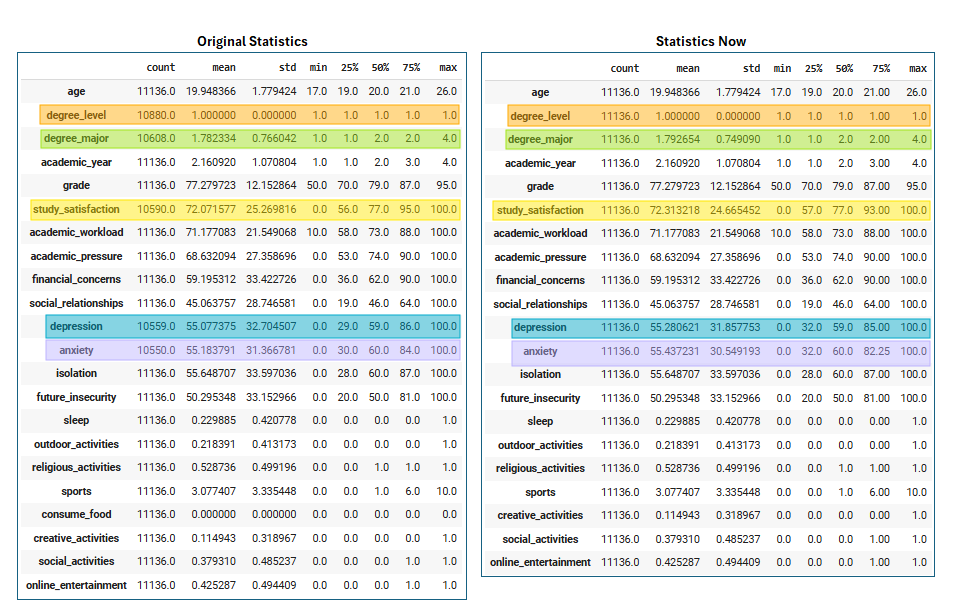

**Conclusions:**

After imputing the missing values in the data set, the descriptive statistics **remained practically unchanged**. Looking at the image above, the mean, standard deviation and distribution percentiles (25%, 50%, 75%) show only slight variations.

As such, we can say that the imputation process did not have a significant impact on the overall distribution of the data, i.e. **imputation preserved the characteristics of the original data**, ensuring consistency for subsequent analysis.

# New Drops

As mentioned in the previous section, the variable `degree_level` only has 1 value, so it is no longer relevant to the analysis.

As such, it will be **dropped** from the dataset.

In [82]:
data_combined_copy = data_combined_copy.drop(columns=['degree_level'])
data_combined_copy.head()

gender   age  degree_major  academic_year  grade residential_status  \
id                                                                        
1     Male  21.0             1            1.0   54.0         Off-Campus   
2     Male  20.0             1            3.0   90.0          On-Campus   
3     Male  19.0             2            1.0   79.0         Off-Campus   
4     Male  20.0             2            3.0   88.0         Off-Campus   
5   Female  19.0             2            1.0   76.0         Off-Campus   

   campus_discrimination sports_engagement average_sleep  study_satisfaction  \
id                                                                             
1                    Yes          7+ times       2-4 hrs                12.0   
2                     No         No Sports       4-6 hrs                77.0   
3                     No         No Sports       4-6 hrs                46.0   
4                    Yes         No Sports       7-8 hrs                85.0   
5                    Yes         No Sports       7-8 hrs               100.0   

    ...  isolation  future_insecurity  sleep  outdoor_activities  \
id  ...                                                            
1   ...      100.0              100.0    0.0                 0.0   
2   ...       52.0               52.0    1.0                 0.0   
3   ...       96.0                0.0    0.0                 0.0   
4   ...      100.0               35.0    0.0                 0.0   
5   ...        5.0               55.0    0.0                 0.0   

    religious_activities  sports  creative_activities  social_activities  \
id                                                                         
1                    0.0     0.0                  0.0                0.0   
2                    1.0     9.0                  0.0                1.0   
3                    1.0     8.0                  0.0                0.0   
4                    0.0     7.0                  0.0                0.0   
5                    1.0     7.0                  0.0                1.0   

    online_entertainment                                         unique_key  
id                                                                           
1                    1.0  Male_21.0_2006-02-25_University_Undergraduate_...  
2                    1.0  Male_20.0_2005-07-16_University_Undergraduate_...  
3                    0.0  Male_19.0_1990-10-16_University_Undergraduate_...  
4                    1.0  Male_20.0_2007-10-18_University_Undergraduate_...  
5                    1.0  Female_19.0_2009-11-28_University_Undergraduat...  

[5 rows x 26 columns]

# Outliers Identification

As seen before, the variables `age`, `academic_workload`, `sleep`, `outdoor_activities`, `creative_activities` and `degree_major` show outliers.

Since the missing values have been dealt with in the meantime, it is important to **reassess** the outliers, especially for the variables that contained missing values (`study_satisfaction`, `depression`, `anxiety` and `degree_major`).

Next, we need to know **how many** outliers there are for each variable.

In [83]:
# @title Checking (again) for Outliers

#Numerical
#numeric_features = data_combined_copy.select_dtypes(include='number').columns

#from math import ceil

#fig, axes = plt.subplots(2, ceil(len(numeric_features) / 2), figsize=(20, 11))

#for ax, feat in zip(axes.flatten(), numeric_features):
#    sns.boxplot(x=data_combined_copy[feat].dropna(), ax=ax)

#title = "Numeric Variables' Box Plots"
#plt.suptitle(title)

#plt.show()

In [84]:
# Categorical
#categorical_features = data_combined_copy.select_dtypes(include=['object', 'category']).columns

#fig, axes = plt.subplots(2, ceil(len(categorical_features) / 2), figsize=(20, 11))

#for ax, feat in zip(axes.flatten(), categorical_features):
#    sns.boxplot(x=data_combined_copy[feat].dropna(), ax=ax)

#title = "Categorical Variables' Box Plots"
#plt.suptitle(title)

#plt.show()

**Observations:**

We can see that all the outliers remain the same, except for the **new existence of outliers** in the variable `study_satisfaction`, which has been assigned values to replace the missing values.

In [85]:
# @title Counting (again) outliers

def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

variables = ['age', 'academic_workload', 'study_satisfaction', 'sleep', 'outdoor_activities', 'creative_activities', 'degree_major']

outlier_counts = {var: count_outliers(data_combined_copy[var]) for var in variables}

for var, count in outlier_counts.items():
    print(f'Number of outliers in {var}: {count}')

Number of outliers in age: 256
Number of outliers in academic_workload: 65
Number of outliers in study_satisfaction: 236
Number of outliers in sleep: 2560
Number of outliers in outdoor_activities: 2432
Number of outliers in creative_activities: 1280
Number of outliers in degree_major: 369


In [86]:
# @title Checking if `study_satisfaction` didn't have outliers

def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

variables = ['study_satisfaction']

outlier_counts = {var: count_outliers(data[var]) for var in variables}

for var, count in outlier_counts.items():
    print(f'Number of outliers in {var}: {count}')

Number of outliers in study_satisfaction: 0


In [87]:
# @title Finding Outliers

unique_outliers = {}

def find_unique_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].unique()

columns = ['age', 'academic_workload', 'study_satisfaction', 'sleep', 'outdoor_activities', 'creative_activities', 'degree_major']

for column in columns:
    unique_outliers[column] = find_unique_outliers(data_combined_copy, column)

unique_outliers

{'age': array([25., 26.]),
 'academic_workload': array([10., 11., 12.]),
 'study_satisfaction': array([0., 3., 2., 4., 1., 5.]),
 'sleep': array([1.]),
 'outdoor_activities': array([1.]),
 'creative_activities': array([1.]),
 'degree_major': array([4])}

**Conclusions:**


*   `age`: nowadays, more and more people don't take a degree course at the typical age of 17/18, but wait a few years to do so. As such, since the only unique values present in this variable are 25 and 26, we **won't consider them to be outliers**


*   `degree_major`: many courses, such as mathematics and physics, have fewer places than others, such as engineering. Therefore, we are **not going to take** these 369 values **as outliers**, but rather assume that the university under study did not have as many places available as the other courses. On the other hand, we can also assume that fewer students are pursuing a professional career in physics, which could also explain the lower take-up of the course


*   `sleep`, `outdoor_activities`, `creative_satisfaction`: since these variables are binary (booleans), i.e. they can only have 1 of 2 values (either 0 or 1), there's no natural way for a value to deviate significantly from the “norm” like other variables. For this reason, plus the fact that they still have a considerable number of outliers (2560, 2432 and 1280, respectively), we **won't consider them outliers** either

        However, it is important to remember that the proportion of True and False values can be very informative and therefore crucial for future analysis

*   `academic_workload`: this variable has 65 outliers, which corresponds to approximately **0.58%** of the data set. As such, there is a high probability that it is *“safe” to eliminate* these 65 rows. However, it is first necessary to confirm the correlations of this variable with the others.
        If there is no significant correlation, they can be deleted. Otherwise, these 65 lines will have to be dealt with

*   `study_satisfaction`: although on a larger scale, the outliers in this variable represent only **1.74%** of the data set. As such, the same treatment as for `academic_workload` has to be carried out on this one

The appearance of 194 outliers in the `study_satisfaction` variable after imputation with the median (it was also tested with the mean and the problem remained the same), suggests that the process may have pushed some values beyond the typical limits, **possibly due to the skewed distribution**.

However, as we can see in the statistical comparison image, the imputation changed the overall metrics *only slightly*, but still introduced these outliers.

To solve this problem, we will test the **KNN imputation method** to see if it reduces the occurrence of new outliers.

# KNN Imputation

As previously mentioned, due to the new existence of outliers, as a result of the imputation by the median (but also by the average) of values to the pre-existing missings, the following points will be made in order to test whether we can mitigate these outliers:

**1.** A **copy** of the dataset with the original missing values will be made

**2.** As we saw earlier, the `degree_level` variable, apart from the missings, only has 1 value. This means that, whatever the imputation, the missings will be placed as that value. Therefore, the variable will already be **removed**


**3.** **KNN** will be used to **impute** values to existing missing values

(KNN can be used with both numerical and categorical variables, but it is best suited to numerical variables. So we might expecte worse results for the variable `degree_major`)

**4.** The method will be evaluated using the **RMSE** (Root Mean Squared Error), **MAE** (Mean Absolute Error), **R²** (Coefficient of Determination) and **KS Test** (Kolmogorov-Smirnov) methods, as well as visually using **histograms** and/or **box-plots**

**5.** **Outliers** will be checked again

In [ ]:
# @title Copy of Dataset

data_cleaned.isna().sum() # To confirm it's the right one

gender                   200
age                      200
degree_level             456
degree_major             728
academic_year            200
grade                    200
residential_status       200
campus_discrimination    200
sports_engagement        200
average_sleep            200
study_satisfaction       746
academic_workload        200
academic_pressure        200
financial_concerns       200
social_relationships     200
depression               777
anxiety                  786
isolation                200
future_insecurity        200
sleep                    200
outdoor_activities       200
religious_activities     200
sports                   200
creative_activities      200
social_activities        200
online_entertainment     200
unique_key                 0
dtype: int64

In [89]:
data_knn_imputed = data_cleaned.copy()

In [90]:
# @title Removal of `degree_level`

data_knn_imputed = data_knn_imputed.drop(columns=['degree_level'])
data_knn_imputed.head()

gender   age  degree_major  academic_year  grade residential_status  \
id                                                                        
1     Male  21.0   Engineering            1.0   54.0         Off-Campus   
2     Male  20.0   Engineering            3.0   90.0          On-Campus   
3     Male  19.0  Data Science            1.0   79.0         Off-Campus   
4     Male  20.0  Data Science            3.0   88.0         Off-Campus   
5   Female  19.0  Data Science            1.0   76.0         Off-Campus   

   campus_discrimination sports_engagement average_sleep  study_satisfaction  \
id                                                                             
1                    Yes          7+ times       2-4 hrs                12.0   
2                     No         No Sports       4-6 hrs                77.0   
3                     No         No Sports       4-6 hrs                46.0   
4                    Yes         No Sports       7-8 hrs                85.0   
5                    Yes         No Sports       7-8 hrs               100.0   

    ...  isolation  future_insecurity  sleep  outdoor_activities  \
id  ...                                                            
1   ...      100.0              100.0    0.0                 0.0   
2   ...       52.0               52.0    1.0                 0.0   
3   ...       96.0                0.0    0.0                 0.0   
4   ...      100.0               35.0    0.0                 0.0   
5   ...        5.0               55.0    0.0                 0.0   

    religious_activities  sports  creative_activities  social_activities  \
id                                                                         
1                    0.0     0.0                  0.0                0.0   
2                    1.0     9.0                  0.0                1.0   
3                    1.0     8.0                  0.0                0.0   
4                    0.0     7.0                  0.0                0.0   
5                    1.0     7.0                  0.0                1.0   

    online_entertainment                                         unique_key  
id                                                                           
1                    1.0  Male_21.0_2006-02-25_University_Undergraduate_...  
2                    1.0  Male_20.0_2005-07-16_University_Undergraduate_...  
3                    0.0  Male_19.0_1990-10-16_University_Undergraduate_...  
4                    1.0  Male_20.0_2007-10-18_University_Undergraduate_...  
5                    1.0  Female_19.0_2009-11-28_University_Undergraduat...  

[5 rows x 26 columns]

In [91]:
# @title KNN Imputation for the Numeric Variables

from sklearn.impute import KNNImputer

variables = ['study_satisfaction', 'depression', 'anxiety']

# Initializing
knn_imputer = KNNImputer(n_neighbors=5) # n_neighbors=5 is the default

# Imputing
data_knn_imputed[variables] = knn_imputer.fit_transform(data_knn_imputed[variables])

In [92]:
# @title KNN Imputation for the Categorical Variable

from sklearn.preprocessing import LabelEncoder

variable = 'degree_major'

label_encoder = LabelEncoder() # Will convert each category (in this case, each major) into an int

data_knn_imputed[variable] = data_knn_imputed[variable].astype(str)
data_knn_imputed[variable] = np.where(data_knn_imputed[variable] == 'nan', np.nan, data_knn_imputed[variable]) # Replaces the ocorrences of the string 'nan' with actual NaN Values, ensuring that the missings are preserved and not used as a category of the encoder

data_knn_imputed[variable] = label_encoder.fit_transform(data_knn_imputed[variable].fillna('MISSING')) # Will replace the missings with the label 'MISSING' (the LabelEncoder can't directly handle NaN values, so it's represented with that label)
placeholder_value = label_encoder.transform(['MISSING'])[0] # Puts the label in a numeric format - 0 - so that all categorical values (including missings) are encoded as integers
data_knn_imputed[variable] = data_knn_imputed[variable].replace(placeholder_value, np.nan) # Will put again the Values as NaN so that the imputer knows where the data needs to be imputed

knn_imputer = KNNImputer(n_neighbors=5) # Can turn a value into a float like 2.4
data_knn_imputed[[variable]] = knn_imputer.fit_transform(data_knn_imputed[[variable]])

data_knn_imputed[variable] = data_knn_imputed[variable].round().astype(int)  # Round to nearest int
data_knn_imputed[variable] = label_encoder.inverse_transform(data_knn_imputed[variable])

In [93]:
data_knn_imputed.isna().sum()

gender                   200
age                      200
degree_major               0
academic_year            200
grade                    200
residential_status       200
campus_discrimination    200
sports_engagement        200
average_sleep            200
study_satisfaction         0
academic_workload        200
academic_pressure        200
financial_concerns       200
social_relationships     200
depression                 0
anxiety                    0
isolation                200
future_insecurity        200
sleep                    200
outdoor_activities       200
religious_activities     200
sports                   200
creative_activities      200
social_activities        200
online_entertainment     200
unique_key                 0
dtype: int64

In [94]:
data_knn_imputed['degree_major']

id
1         Engineering
2         Engineering
3        Data Science
4        Data Science
5        Data Science
             ...     
11332     Engineering
11333     Engineering
11334    Data Science
11335         Physics
11336     Engineering
Name: degree_major, Length: 11336, dtype: object

**Observation:**

So that the categorical variable `degree_major` can also be evaluated with all the same metrics along with the other variables, it will be **transformed** to **numeric**.

In [95]:
# @title Transforming `degree_major`

degree_major_mapping = {
    'Engineering': 1,
    'Data Science': 2,
    'Mathematics': 3,
    'Physics': 4
}
data_knn_imputed['degree_major'] = data_knn_imputed['degree_major'].map(degree_major_mapping)

In [96]:
data_knn_imputed['degree_major']

id
1        1
2        1
3        2
4        2
5        2
        ..
11332    1
11333    1
11334    2
11335    4
11336    1
Name: degree_major, Length: 11336, dtype: int64

In [97]:
#df_melt_discrimination = data_knn_imputed.melt(var_name='Variable', value_name='Value')
#df_discrimination = df_melt_discrimination[df_melt_discrimination['Variable'] == 'degree_major']

#g = sns.FacetGrid(df_discrimination, col="Variable", sharex=False, sharey=False)
#g.map(sns.countplot, "Value", order=None)
#g.set_titles("{col_name}")

**Explanation of the (new) Metrics of Evaluation:**



*   **R² (Coefficient of Determination):** Measures how well the imputed values match the original ones.
        An R² close to 1 indicates a good fit

*   **Kolmogorov-Smirnov (KS) Test:** Checks if the distributions of original and imputed values are statistically similar. The KS Statistic indicates the maximum difference between distributions, while the KS p-value tells if this difference is statistically significant.
        Higher p-values are better

In [98]:
# @title Evaluation

from sklearn.metrics import r2_score

another_copy = data_cleaned.copy()

degree_major_mapping = {
    'Engineering': 1,
    'Data Science': 2,
    'Mathematics': 3,
    'Physics': 4
}
another_copy['degree_major'] = another_copy['degree_major'].map(degree_major_mapping)


variables = ['degree_major', 'study_satisfaction', 'depression', 'anxiety']

evaluation_metrics = {}

for var in variables:

    mask = another_copy[var].notna()

    # Metrics
    mae= mean_absolute_error(data_knn_imputed[var][mask], another_copy[var][mask])
    rmse = mean_squared_error(data_knn_imputed[var][mask], another_copy[var][mask], squared=False)
    r2 = r2_score(data_knn_imputed[var][mask], another_copy[var][mask])
    ks_stat, ks_pvalue = ks_2samp(data_knn_imputed[var][mask], another_copy[var][mask])

    evaluation_metrics[var] = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'KS Statistic': ks_stat,
        'KS p-value': ks_pvalue
    }


evaluation_df = pd.DataFrame(evaluation_metrics).T
print("Evaluation Metrics:\n", evaluation_df)

Evaluation Metrics:
                     RMSE  MAE   R²  KS Statistic  KS p-value
degree_major         0.0  0.0  1.0           0.0         1.0
study_satisfaction   0.0  0.0  1.0           0.0         1.0
depression           0.0  0.0  1.0           0.0         1.0
anxiety              0.0  0.0  1.0           0.0         1.0


c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: Futu

**Conclusion:**

The evaluation metrics indicate, for each variable, a perfect match between the imputed values and the original data set.

The **RMSE** and **MAE** are both **0**, which means that there is **no error** in the imputed values compared to the original values, while the **R²** score of **1** demonstrates **total accuracy** in predicting the observed values.

In addition, the **KS Test** produces a **statistic** of **0** and a **p-value** of **1** for all variables, suggesting that the **distribution** of the imputed values is **statistically identical** to the distribution of the **original**, non-missing values.

These results suggest that the imputation method used is exceptionally effective in replicating the characteristics of the original data without introducing any significant bias or deviation. However, from a *critical point of view*, such results are **unlikely** and so let's take a look at the visualizations below for a better visually comparison:

In [99]:
#for var in variables:
#    plt.figure(figsize=(12, 5))

    # Histogram Comparison
#    plt.subplot(1, 2, 1)
#    sns.histplot(another_copy[var].dropna(), color='blue', label='Original')
#    sns.histplot(data_knn_imputed[var].dropna(), color='red',  label='Imputed')
#    plt.title(f'Histogram of {var} (Original vs. Imputed)')
#    plt.legend()

#    plt.tight_layout()
#    plt.show()

In [100]:
#for var in variables:
#    plt.figure(figsize=(12, 5))

    # Box Plot Comparison
##    plt.subplot(1, 2, 2)
 #   sns.boxplot(data=[another_copy[var].dropna()], palette=["blue"])
 #   sns.boxplot(data=[data_knn_imputed[var].dropna()], palette=["red"])
 #   plt.xticks([0, 1], ["Original", "Imputed"])
 #   plt.title(f'Box Plot of {var} (Original vs. Imputed)')

 #   plt.tight_layout()
 #   plt.show()

**Observation:**

From the graphs, we can see that the distributions of the variables **do not seem to have changed significantly** with KNN imputation, which shows the efficiency of the method

In [101]:
# @title Comparing Statistics (once more)

data_knn_imputed.describe().T

count       mean        std   min   25%   50%   75%  \
age                   11136.0  19.948366   1.779424  17.0  19.0  20.0  21.0   
degree_major          11336.0   1.732092   0.765452   1.0   1.0   2.0   2.0   
academic_year         11136.0   2.160920   1.070804   1.0   1.0   2.0   3.0   
grade                 11136.0  77.279723  12.152864  50.0  70.0  79.0  87.0   
study_satisfaction    11336.0  71.902427  24.654067   0.0  56.8  75.4  93.0   
academic_workload     11136.0  71.177083  21.549068  10.0  58.0  73.0  88.0   
academic_pressure     11136.0  68.632094  27.358696   0.0  53.0  74.0  90.0   
financial_concerns    11136.0  59.195312  33.422726   0.0  36.0  62.0  90.0   
social_relationships  11136.0  45.063757  28.746581   0.0  19.0  46.0  64.0   
depression            11336.0  55.203412  32.019552   0.0  31.0  57.4  85.0   
anxiety               11336.0  55.322315  30.782251   0.0  31.0  59.0  83.0   
isolation             11136.0  55.648707  33.597036   0.0  28.0  60.0  87.0   
future_insecurity     11136.0  50.295348  33.152966   0.0  20.0  50.0  81.0   
sleep                 11136.0   0.229885   0.420778   0.0   0.0   0.0   0.0   
outdoor_activities    11136.0   0.218391   0.413173   0.0   0.0   0.0   0.0   
religious_activities  11136.0   0.528736   0.499196   0.0   0.0   1.0   1.0   
sports                11136.0   3.077407   3.335448   0.0   0.0   1.0   6.0   
creative_activities   11136.0   0.114943   0.318967   0.0   0.0   0.0   0.0   
social_activities     11136.0   0.379310   0.485237   0.0   0.0   0.0   1.0   
online_entertainment  11136.0   0.425287   0.494409   0.0   0.0   0.0   1.0   

                        max  
age                    26.0  
degree_major            4.0  
academic_year           4.0  
grade                  95.0  
study_satisfaction    100.0  
academic_workload     100.0  
academic_pressure     100.0  
financial_concerns    100.0  
social_relationships  100.0  
depression            100.0  
anxiety               100.0  
isolation             100.0  
future_insecurity     100.0  
sleep                   1.0  
outdoor_activities      1.0  
religious_activities    1.0  
sports                 10.0  
creative_activities     1.0  
social_activities       1.0  
online_entertainment    1.0

In [102]:
data_original_copy.describe().T

count       mean        std   min   25%   50%   75%  \
age                   11136.0  19.948366   1.779424  17.0  19.0  20.0  21.0   
degree_level          10880.0   1.000000   0.000000   1.0   1.0   1.0   1.0   
degree_major          10608.0   1.782334   0.766042   1.0   1.0   2.0   2.0   
academic_year         11136.0   2.160920   1.070804   1.0   1.0   2.0   3.0   
grade                 11136.0  77.279723  12.152864  50.0  70.0  79.0  87.0   
study_satisfaction    10590.0  72.071577  25.269816   0.0  56.0  77.0  95.0   
academic_workload     11136.0  71.177083  21.549068  10.0  58.0  73.0  88.0   
academic_pressure     11136.0  68.632094  27.358696   0.0  53.0  74.0  90.0   
financial_concerns    11136.0  59.195312  33.422726   0.0  36.0  62.0  90.0   
social_relationships  11136.0  45.063757  28.746581   0.0  19.0  46.0  64.0   
depression            10559.0  55.077375  32.704507   0.0  29.0  59.0  86.0   
anxiety               10550.0  55.183791  31.366781   0.0  30.0  60.0  84.0   
isolation             11136.0  55.648707  33.597036   0.0  28.0  60.0  87.0   
future_insecurity     11136.0  50.295348  33.152966   0.0  20.0  50.0  81.0   
sleep                 11136.0   0.229885   0.420778   0.0   0.0   0.0   0.0   
outdoor_activities    11136.0   0.218391   0.413173   0.0   0.0   0.0   0.0   
religious_activities  11136.0   0.528736   0.499196   0.0   0.0   1.0   1.0   
sports                11136.0   3.077407   3.335448   0.0   0.0   1.0   6.0   
consume_food          11136.0   0.000000   0.000000   0.0   0.0   0.0   0.0   
creative_activities   11136.0   0.114943   0.318967   0.0   0.0   0.0   0.0   
social_activities     11136.0   0.379310   0.485237   0.0   0.0   0.0   1.0   
online_entertainment  11136.0   0.425287   0.494409   0.0   0.0   0.0   1.0   

                        max  
age                    26.0  
degree_level            1.0  
degree_major            4.0  
academic_year           4.0  
grade                  95.0  
study_satisfaction    100.0  
academic_workload     100.0  
academic_pressure     100.0  
financial_concerns    100.0  
social_relationships  100.0  
depression            100.0  
anxiety               100.0  
isolation             100.0  
future_insecurity     100.0  
sleep                   1.0  
outdoor_activities      1.0  
religious_activities    1.0  
sports                 10.0  
consume_food            0.0  
creative_activities     1.0  
social_activities       1.0  
online_entertainment    1.0

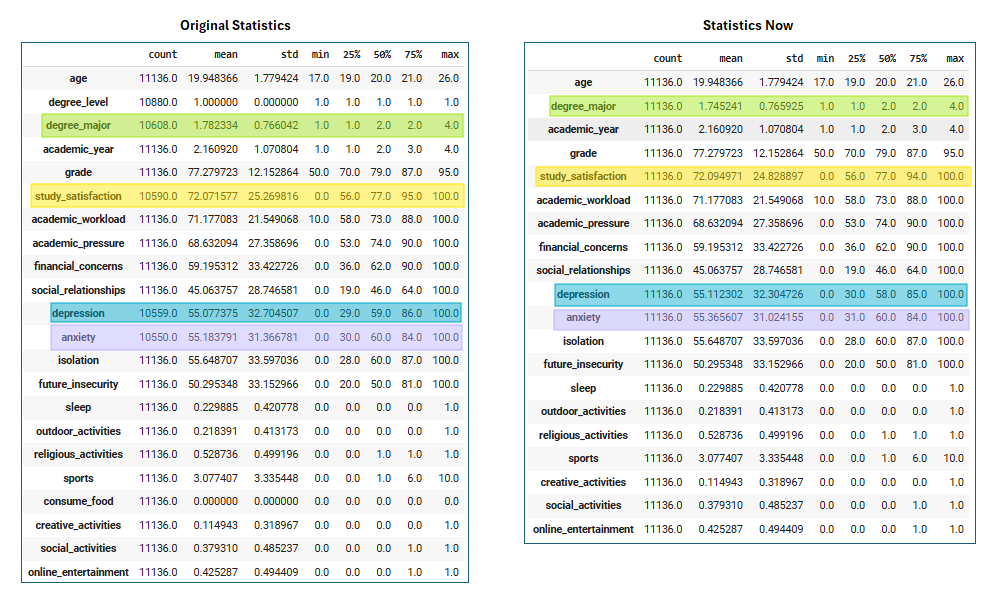

In [103]:
# @title Checking (yet again) Outliers

def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

variables = ['age','academic_workload', 'study_satisfaction', 'sleep', 'outdoor_activities', 'creative_activities', 'degree_major']

outlier_counts = {var: count_outliers(data_knn_imputed[var]) for var in variables}

for var, count in outlier_counts.items():
    print(f'Number of outliers in {var}: {count}')

Number of outliers in age: 256
Number of outliers in academic_workload: 65
Number of outliers in study_satisfaction: 194
Number of outliers in sleep: 2560
Number of outliers in outdoor_activities: 2432
Number of outliers in creative_activities: 1280
Number of outliers in degree_major: 369


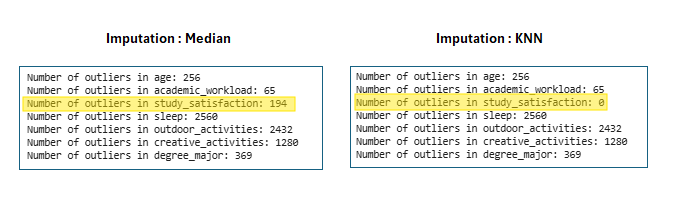

**Conclusions:**

In the **previous** attempt to deal with the missing data, median imputation was used (and also tested with mean imputation). Although it obtained reasonable results, it inadvertently introduced *new outliers* that didn't exist in the original data, which could distort the subsequent analysis.

**Switching to KNN imputation** produced *similar* results - **better**, even - **without generating any additional outliers.**

In this way, it can be concluded that KNN imputation preserves the natural variability of the data, resulting in a cleaner data set that is more representative of the original distribution.



*   As such, the **dataset** to be used **from now on** is the dataset resulting from imputation with **KNN**



In [104]:
# @title Finding (again) Outliers

unique_outliers = {}

def find_unique_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].unique()

columns = ['age', 'academic_workload', 'sleep', 'outdoor_activities', 'creative_activities', 'degree_major']

for column in columns:
    unique_outliers[column] = find_unique_outliers(data_knn_imputed, column)

unique_outliers

{'age': array([25., 26.]),
 'academic_workload': array([10., 11., 12.]),
 'sleep': array([1.]),
 'outdoor_activities': array([1.]),
 'creative_activities': array([1.]),
 'degree_major': array([4])}

**Conclusions:**

Since the results of the outliers (except for the `study_satisfaction` variable, which no longer has outliers) **remain the same**, the conclusions drawn earlier stand, i.e:

*   `age`: nowadays, more and more people don't take a degree course at the typical age of 17/18, but wait a few years to do so. As such, since the only unique values present in this variable are 25 and 26, we **won't consider them to be outliers**


*   `degree_major`: many courses, such as mathematics and physics, have fewer places than others, such as engineering. Therefore, we are **not going to take** these 369 values **as outliers**, but rather assume that the university under study did not have as many places available as the other courses. On the other hand, we can also assume that fewer students are pursuing a professional career in physics, which could also explain the lower take-up of the course


*   `sleep`, `outdoor_activities`, `creative_satisfaction`: since these variables are binary (booleans), i.e. they can only have 1 of 2 values (either 0 or 1), there's no natural way for a value to deviate significantly from the “norm” like other variables. For this reason, plus the fact that they still have a considerable number of outliers (2560, 2432 and 1280, respectively), we **won't consider them outliers** either

        However, it is important to remember that the proportion of True and False values can be very informative and therefore crucial for future analysis

*   `academic_workload`: this variable has 65 outliers, which corresponds to approximately **0.58%** of the data set. As such, there is a high probability that it is *“safe” to eliminate* these 65 rows. However, it is first necessary to confirm the correlations of this variable with the others.
        If there is no significant correlation, they can be deleted. Otherwise, these 65 lines will have to be dealt with

# Variables Transformation

In [105]:
data_knn_imputed.head()

gender   age  degree_major  academic_year  grade residential_status  \
id                                                                        
1     Male  21.0             1            1.0   54.0         Off-Campus   
2     Male  20.0             1            3.0   90.0          On-Campus   
3     Male  19.0             2            1.0   79.0         Off-Campus   
4     Male  20.0             2            3.0   88.0         Off-Campus   
5   Female  19.0             2            1.0   76.0         Off-Campus   

   campus_discrimination sports_engagement average_sleep  study_satisfaction  \
id                                                                             
1                    Yes          7+ times       2-4 hrs                12.0   
2                     No         No Sports       4-6 hrs                77.0   
3                     No         No Sports       4-6 hrs                46.0   
4                    Yes         No Sports       7-8 hrs                85.0   
5                    Yes         No Sports       7-8 hrs               100.0   

    ...  isolation  future_insecurity  sleep  outdoor_activities  \
id  ...                                                            
1   ...      100.0              100.0    0.0                 0.0   
2   ...       52.0               52.0    1.0                 0.0   
3   ...       96.0                0.0    0.0                 0.0   
4   ...      100.0               35.0    0.0                 0.0   
5   ...        5.0               55.0    0.0                 0.0   

    religious_activities  sports  creative_activities  social_activities  \
id                                                                         
1                    0.0     0.0                  0.0                0.0   
2                    1.0     9.0                  0.0                1.0   
3                    1.0     8.0                  0.0                0.0   
4                    0.0     7.0                  0.0                0.0   
5                    1.0     7.0                  0.0                1.0   

    online_entertainment                                         unique_key  
id                                                                           
1                    1.0  Male_21.0_2006-02-25_University_Undergraduate_...  
2                    1.0  Male_20.0_2005-07-16_University_Undergraduate_...  
3                    0.0  Male_19.0_1990-10-16_University_Undergraduate_...  
4                    1.0  Male_20.0_2007-10-18_University_Undergraduate_...  
5                    1.0  Female_19.0_2009-11-28_University_Undergraduat...  

[5 rows x 26 columns]

In [106]:
dataset = data_knn_imputed.copy()

**1)** `sports`:

In [107]:
dataset['sports'] = np.where(dataset['sports'] != 0, 1, 0) # Transform the variable into binary values (1 for any non-zero, 0 for zero)

In [108]:
dataset['sports']

id
1        0
2        1
3        1
4        1
5        1
        ..
11332    0
11333    1
11334    0
11335    1
11336    1
Name: sports, Length: 11336, dtype: int64

In [109]:
#df_melt_sports = dataset.melt(var_name='Variable', value_name='Value')
#df_sports = df_melt_sports[df_melt_sports['Variable'] == 'sports']

#g = sns.FacetGrid(df_sports, col="Variable", sharex=False, sharey=False)
#g.map(sns.countplot, "Value", order=None)
#g.set_titles("{col_name}")

**2)** `campus_discrimination`:

In [110]:
dataset['campus_discrimination'] = dataset['campus_discrimination'].replace({'Yes': 1, 'No': 0})

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13048\649984624.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['campus_discrimination'] = dataset['campus_discrimination'].replace({'Yes': 1, 'No': 0})


In [111]:
dataset['campus_discrimination']

id
1        1.0
2        0.0
3        0.0
4        1.0
5        1.0
        ... 
11332    1.0
11333    0.0
11334    0.0
11335    1.0
11336    0.0
Name: campus_discrimination, Length: 11336, dtype: float64

In [112]:
#df_melt_discrimination = dataset.melt(var_name='Variable', value_name='Value')
#df_discrimination = df_melt_discrimination[df_melt_discrimination['Variable'] == 'campus_discrimination']

#g = sns.FacetGrid(df_discrimination, col="Variable", sharex=False, sharey=False)
#g.map(sns.countplot, "Value", order=None)
#g.set_titles("{col_name}")

**Observation:** The following transformations are for transforming categorical variables into numerical variables, so that they can also be present in the *correlation matrix* presented below, using .corr( )

**3)** `gender`:

In [113]:
dataset_corr = dataset.copy()

In [114]:
dataset_corr['gender'] = dataset_corr['gender'].replace({1: 'Female', 0: 'Male'})

**4)** `residential_status`:

In [ ]:
dataset_corr['residential_status'] = dataset_corr['residential_status'].replace({'On-Campus': 1, 'Off-Campus': 0})

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13048\3227737737.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_corr['residential_status'] = dataset_corr['residential_status'].replace({'On-Campus': 1, 'Off-Campus': 0})


**5)** `degree_major`

This variable (initially categorical in nature) has already been transformed into numeric

In [116]:
dataset_corr['degree_major'].head()

id
1    1
2    1
3    2
4    2
5    2
Name: degree_major, dtype: int64

**6)** `sports_engagement`

In [117]:
sports_engagement_mapping = {
    'No Sports': 1,
    '1-3 times': 2,
    '4-6 times': 3,
    '7+ times': 4
}
dataset_corr['sports_engagement'] = dataset_corr['sports_engagement'].map(sports_engagement_mapping)

In [118]:
dataset_corr['sports_engagement'].isna().sum()

np.int64(200)

In [119]:
#df_melt_discrimination = dataset_corr.melt(var_name='Variable', value_name='Value')
#df_discrimination = df_melt_discrimination[df_melt_discrimination['Variable'] == 'sports_engagement']

#g = sns.FacetGrid(df_discrimination, col="Variable", sharex=False, sharey=False)
#g.map(sns.countplot, "Value", order=None)
#g.set_titles("{col_name}")

**7)** `average_sleep`

In [120]:
average_sleep_mapping = {
    '2-4 hrs': 1,
    '4-6 hrs': 2,
    '7-8 hrs': 3
}
dataset_corr['average_sleep'] = dataset_corr['average_sleep'].map(average_sleep_mapping)

In [121]:
dataset_corr['average_sleep']

id
1        1.0
2        2.0
3        2.0
4        3.0
5        3.0
        ... 
11332    3.0
11333    2.0
11334    3.0
11335    1.0
11336    2.0
Name: average_sleep, Length: 11336, dtype: float64

In [122]:
#df_melt_discrimination = dataset_corr.melt(var_name='Variable', value_name='Value')
#df_discrimination = df_melt_discrimination[df_melt_discrimination['Variable'] == 'average_sleep']

#g = sns.FacetGrid(df_discrimination, col="Variable", sharex=False, sharey=False)
#g.map(sns.countplot, "Value", order=None)
#g.set_titles("{col_name}")

In [123]:
# @title Descriptive Statistics @ All Variables

dataset_corr.describe().T

count       mean        std   min   25%   50%   75%  \
age                    11136.0  19.948366   1.779424  17.0  19.0  20.0  21.0   
degree_major           11336.0   1.732092   0.765452   1.0   1.0   2.0   2.0   
academic_year          11136.0   2.160920   1.070804   1.0   1.0   2.0   3.0   
grade                  11136.0  77.279723  12.152864  50.0  70.0  79.0  87.0   
residential_status     11136.0   0.252874   0.434679   0.0   0.0   0.0   1.0   
campus_discrimination  11136.0   0.252874   0.434679   0.0   0.0   0.0   1.0   
sports_engagement      11136.0   1.873563   1.026194   1.0   1.0   2.0   2.0   
average_sleep          11136.0   2.310345   0.573588   1.0   2.0   2.0   3.0   
study_satisfaction     11336.0  71.902427  24.654067   0.0  56.8  75.4  93.0   
academic_workload      11136.0  71.177083  21.549068  10.0  58.0  73.0  88.0   
academic_pressure      11136.0  68.632094  27.358696   0.0  53.0  74.0  90.0   
financial_concerns     11136.0  59.195312  33.422726   0.0  36.0  62.0  90.0   
social_relationships   11136.0  45.063757  28.746581   0.0  19.0  46.0  64.0   
depression             11336.0  55.203412  32.019552   0.0  31.0  57.4  85.0   
anxiety                11336.0  55.322315  30.782251   0.0  31.0  59.0  83.0   
isolation              11136.0  55.648707  33.597036   0.0  28.0  60.0  87.0   
future_insecurity      11136.0  50.295348  33.152966   0.0  20.0  50.0  81.0   
sleep                  11136.0   0.229885   0.420778   0.0   0.0   0.0   0.0   
outdoor_activities     11136.0   0.218391   0.413173   0.0   0.0   0.0   0.0   
religious_activities   11136.0   0.528736   0.499196   0.0   0.0   1.0   1.0   
sports                 11336.0   0.683839   0.464997   0.0   0.0   1.0   1.0   
creative_activities    11136.0   0.114943   0.318967   0.0   0.0   0.0   0.0   
social_activities      11136.0   0.379310   0.485237   0.0   0.0   0.0   1.0   
online_entertainment   11136.0   0.425287   0.494409   0.0   0.0   0.0   1.0   

                         max  
age                     26.0  
degree_major             4.0  
academic_year            4.0  
grade                   95.0  
residential_status       1.0  
campus_discrimination    1.0  
sports_engagement        4.0  
average_sleep            3.0  
study_satisfaction     100.0  
academic_workload      100.0  
academic_pressure      100.0  
financial_concerns     100.0  
social_relationships   100.0  
depression             100.0  
anxiety                100.0  
isolation              100.0  
future_insecurity      100.0  
sleep                    1.0  
outdoor_activities       1.0  
religious_activities     1.0  
sports                   1.0  
creative_activities      1.0  
social_activities        1.0  
online_entertainment     1.0

# Correlations

In [124]:
correlation_matrix = dataset_corr.select_dtypes(include=['float64', 'int64']).corr()
correlation_matrix

age  degree_major  academic_year     grade  \
age                    1.000000      0.164900       0.503117  0.073356   
degree_major           0.164900      1.000000       0.057107 -0.075974   
academic_year          0.503117      0.057107       1.000000  0.212650   
grade                  0.073356     -0.075974       0.212650  1.000000   
residential_status    -0.033160     -0.173338      -0.062736 -0.017675   
campus_discrimination  0.234236      0.094520       0.159536  0.112753   
sports_engagement     -0.122693     -0.046127      -0.148861 -0.110488   
average_sleep          0.068847      0.123357       0.030978  0.101989   
study_satisfaction     0.000139      0.029314      -0.096680  0.233963   
academic_workload      0.036850     -0.078727       0.077348 -0.150777   
academic_pressure     -0.170916     -0.238386      -0.041712 -0.127306   
financial_concerns     0.117951     -0.068525       0.070347 -0.000152   
social_relationships  -0.086996     -0.015622      -0.052843 -0.027780   
depression             0.071610     -0.035361       0.094253  0.073507   
anxiety                0.079426     -0.063868       0.212586  0.018848   
isolation             -0.022303      0.031055       0.047798 -0.036534   
future_insecurity      0.158039     -0.133020       0.217252  0.013916   
sleep                  0.010337      0.012591       0.173017 -0.035407   
outdoor_activities     0.038792      0.038758       0.102436 -0.136400   
religious_activities   0.033467      0.059901       0.034358  0.107369   
sports                -0.096473      0.047049       0.080554 -0.054671   
creative_activities   -0.042707      0.097816      -0.121472 -0.010959   
social_activities      0.078122     -0.084791      -0.095360 -0.016258   
online_entertainment   0.154197     -0.084063       0.196417  0.065560   

                       residential_status  campus_discrimination  \
age                             -0.033160               0.234236   
degree_major                    -0.173338               0.094520   
academic_year                   -0.062736               0.159536   
grade                           -0.017675               0.112753   
residential_status               1.000000              -0.216783   
campus_discrimination           -0.216783               1.000000   
sports_engagement               -0.211792              -0.005628   
average_sleep                   -0.130367               0.007949   
study_satisfaction               0.022218              -0.157220   
academic_workload                0.116541              -0.041684   
academic_pressure                0.072829               0.013639   
financial_concerns               0.174636               0.078599   
social_relationships             0.022485              -0.088643   
depression                      -0.014924               0.192556   
anxiety                         -0.052172               0.162361   
isolation                       -0.056144               0.138864   
future_insecurity               -0.113555               0.279196   
sleep                            0.184935              -0.129310   
outdoor_activities              -0.051499              -0.051499   
religious_activities            -0.139443              -0.086467   
sports                           0.117762              -0.165257   
creative_activities              0.039072               0.039072   
social_activities               -0.018793              -0.018793   
online_entertainment            -0.072548               0.248386   

                       sports_engagement  average_sleep  study_satisfaction  \
age                            -0.122693       0.068847            0.000139   
degree_major                   -0.046127       0.123357            0.029314   
academic_year                  -0.148861       0.030978           -0.096680   
grade                          -0.110488       0.101989            0.233963   
residential_status             -0.211792      -0.130367            0.022218   
ca

In [125]:
#correlation_matrix.to_csv('correlation_matrix.csv')

##from google.colab import files
#files.download('correlation_matrix.csv')

In [126]:
#plt.figure(figsize=(16, 12))
#sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'shrink': 0.8})
#plt.xticks(rotation=45, ha="right")
##plt.yticks(rotation=0)
#plt.title("Correlation Matrix")
#plt.show()

1) **Back to the outliers:**


*   `academic_workload` has a **moderate correlation** with `academic_pressure` (~ 0.49) and then with `anxiety` (~ 0.413) and `depression` (~ 0.411)




**2) First impressions at a glance:**


**Strong** Correlations:

*   `depression` , `anxiety` : 0.841
*   `depression` , `isolation` : 0.715
*   `anxiety` , `isolation` : 0.683


**Moderate** Correlations:

*   `age` , `academic_year` : 0.50
*   `academic_workload` , `academic_pressure` : 	0.489
*   `future_insecurity` , `depression` : 0.483
*   `future_insecurity` , `anxiety` : 0.463



**Moderate Weak** Correlations:

*   `academic_workload` , `anxiety` : 0.413
*   `academic_workload` , `depression` : 0.411
*   `academic_pressure` , `depression` : 0.404
*   `financial_concerns` , `depression` : 0.394

# Final transformations / Handling Outliers

This section analyzes the **correlations, descriptive statistics and distribution graphs** **before** and **after** **removing** the **outliers** for the variable `academic_workload`. The following steps will be followed:

1. Remove the lines with outliers from the variable
2. Recalculate correlations, descriptive statistics and distributions
3. Compare the new outputs with those from the previous sections
        If the new outputs are better than the old ones then:
            Delete outliers
        else:
            Wait( )

In [127]:
dataset_corr.head()

gender   age  degree_major  academic_year  grade  residential_status  \
id                                                                         
1     Male  21.0             1            1.0   54.0                 0.0   
2     Male  20.0             1            3.0   90.0                 1.0   
3     Male  19.0             2            1.0   79.0                 0.0   
4     Male  20.0             2            3.0   88.0                 0.0   
5   Female  19.0             2            1.0   76.0                 0.0   

    campus_discrimination  sports_engagement  average_sleep  \
id                                                            
1                     1.0                4.0            1.0   
2                     0.0                1.0            2.0   
3                     0.0                1.0            2.0   
4                     1.0                1.0            3.0   
5                     1.0                1.0            3.0   

    study_satisfaction  ...  isolation  future_insecurity  sleep  \
id                      ...                                        
1                 12.0  ...      100.0              100.0    0.0   
2                 77.0  ...       52.0               52.0    1.0   
3                 46.0  ...       96.0                0.0    0.0   
4                 85.0  ...      100.0               35.0    0.0   
5                100.0  ...        5.0               55.0    0.0   

    outdoor_activities  religious_activities  sports  creative_activities  \
id                                                                          
1                  0.0                   0.0       0                  0.0   
2                  0.0                   1.0       1                  0.0   
3                  0.0                   1.0       1                  0.0   
4                  0.0                   0.0       1                  0.0   
5                  0.0                   1.0       1                  0.0   

    social_activities  online_entertainment  \
id                                            
1                 0.0                   1.0   
2                 1.0                   1.0   
3                 0.0                   0.0   
4                 0.0                   1.0   
5                 1.0                   1.0   

                                           unique_key  
id                                                     
1   Male_21.0_2006-02-25_University_Undergraduate_...  
2   Male_20.0_2005-07-16_University_Undergraduate_...  
3   Male_19.0_1990-10-16_University_Undergraduate_...  
4   Male_20.0_2007-10-18_University_Undergraduate_...  
5   Female_19.0_2009-11-28_University_Undergraduat...  

[5 rows x 26 columns]

In [128]:
handout = dataset_corr.copy()

In [129]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [130]:
#------>>>>>> REMOVE THIS ! <<<<<<-------
#exclude_columns = ['residential_status', 'sports_engagement', 'average_sleep']
#handout_copy = handout.drop(columns=exclude_columns).copy()


In [131]:
#------>>>>>> REMOVE THIS ! <<<<<<-------

#handout_copy.shape

In [132]:
handout = remove_outliers(handout, 'academic_workload')

In [133]:
# @title 1. Correlations

correlation_matrix_aw = handout.select_dtypes(include=['float64', 'int64']).corr()
correlation_matrix_aw

age  degree_major  academic_year     grade  \
age                    1.000000      0.161691       0.503018  0.075543   
degree_major           0.161691      1.000000       0.055520 -0.075001   
academic_year          0.503018      0.055520       1.000000  0.216688   
grade                  0.075543     -0.075001       0.216688  1.000000   
residential_status    -0.033996     -0.174881      -0.061861 -0.016937   
campus_discrimination  0.239773      0.100026       0.162255  0.112992   
sports_engagement     -0.119728     -0.041033      -0.149833 -0.114189   
average_sleep          0.070806      0.126027       0.028894  0.100975   
study_satisfaction     0.001724      0.031105      -0.091547  0.232633   
academic_workload      0.034234     -0.085022       0.084876 -0.150779   
academic_pressure     -0.173801     -0.240963      -0.040793 -0.124695   
financial_concerns     0.118462     -0.067542       0.070953  0.003193   
social_relationships  -0.086252     -0.014556      -0.051356 -0.027328   
depression             0.070025     -0.037909       0.096962  0.076571   
anxiety                0.077967     -0.066923       0.216586  0.021421   
isolation             -0.025764      0.028590       0.045167 -0.032729   
future_insecurity      0.159012     -0.132755       0.220203  0.015499   
sleep                  0.010235      0.014152       0.173099 -0.035187   
outdoor_activities     0.040204      0.041407       0.101467 -0.134729   
religious_activities   0.030697      0.056708       0.032334  0.107674   
sports                -0.100923      0.056678       0.078929 -0.051944   
creative_activities   -0.043269      0.097612      -0.121165 -0.010495   
social_activities      0.077739     -0.087396      -0.093929 -0.018018   
online_entertainment   0.156444     -0.083480       0.201670  0.064572   

                       residential_status  campus_discrimination  \
age                             -0.033996               0.239773   
degree_major                    -0.174881               0.100026   
academic_year                   -0.061861               0.162255   
grade                           -0.016937               0.112992   
residential_status               1.000000              -0.216528   
campus_discrimination           -0.216528               1.000000   
sports_engagement               -0.209729              -0.008802   
average_sleep                   -0.126925               0.005103   
study_satisfaction               0.019619              -0.155805   
academic_workload                0.109648              -0.035950   
academic_pressure                0.068255               0.015187   
financial_concerns               0.172202               0.080462   
social_relationships             0.021188              -0.091390   
depression                      -0.020037               0.199493   
anxiety                         -0.057656               0.169000   
isolation                       -0.058613               0.143204   
future_insecurity               -0.116766               0.280880   
sleep                            0.185067              -0.127486   
outdoor_activities              -0.051605              -0.056252   
religious_activities            -0.139709              -0.080644   
sports                           0.115817              -0.160862   
creative_activities              0.037894               0.040126   
social_activities               -0.019800              -0.015303   
online_entertainment            -0.074366               0.248076   

                       sports_engagement  average_sleep  study_satisfaction  \
age                            -0.119728       0.070806            0.001724   
degree_major                   -0.041033       0.126027            0.031105   
academic_year                  -0.149833       0.028894           -0.091547   
grade                          -0.114189       0.100975            0.232633   
residential_status             -0.209729      -0.126925            0.019619   
ca

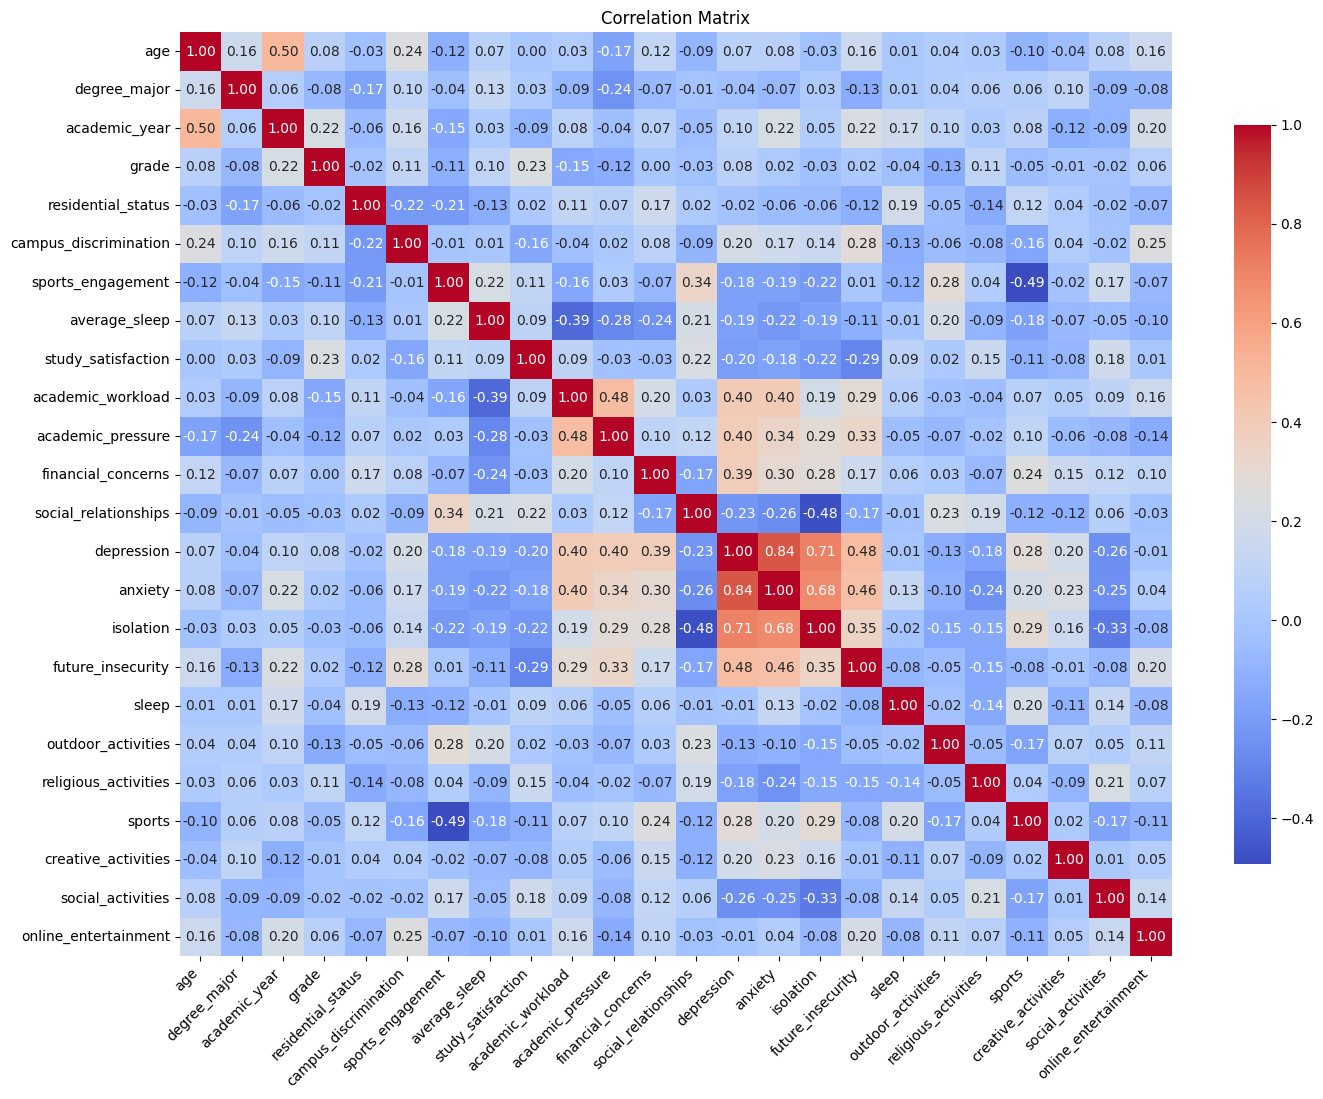

In [134]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_aw, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'shrink': 0.8})
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.show()

For better visualization, the correlation matrix was downloaded and opened in Microsoft Excel, where the same color formatting was done as in a Heatmap. Then it was added the previous correlations of the variable for an easier comparison.

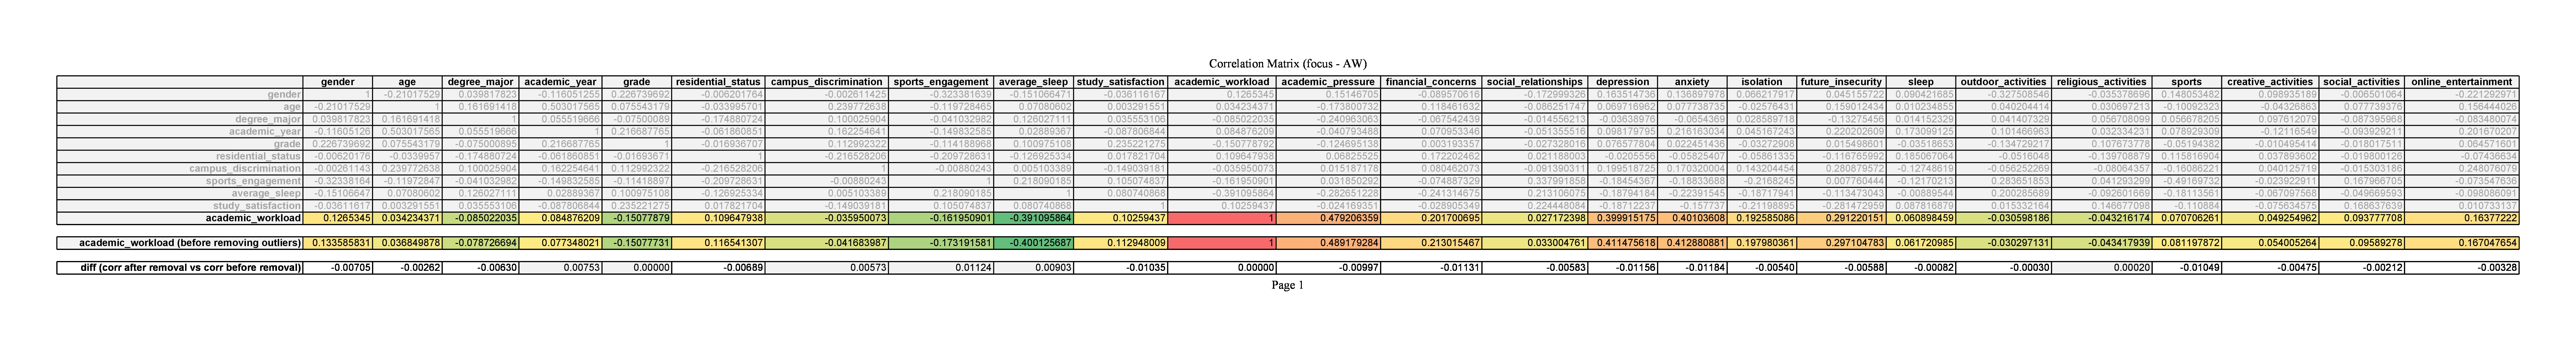

**Observation:**

As can be seen from the image above, some correlations increased, but most also decreased.

It is important to note that the differences are **very very small**, and the small increases and dicreases present do not change the correlations in any meaningful matter, so they are *not significant*.

In [135]:
# @title 2. Descriptive Statistics

dataset_corr['academic_workload'].describe().T

count    11136.000000
mean        71.177083
std         21.549068
min         10.000000
25%         58.000000
50%         73.000000
75%         88.000000
max        100.000000
Name: academic_workload, dtype: float64

In [136]:
handout['academic_workload'].describe().T

count    11071.000000
mean        71.530485
std         21.111275
min         13.000000
25%         59.000000
50%         73.000000
75%         89.000000
max        100.000000
Name: academic_workload, dtype: float64

**Observation:**

After removing the outliers, the data set shows **slightly higher values** for its **central tendency** (mean and median) and **reduced variability** (standard deviation).


This means that the outliers removed were probably lower values (also given than the minimum value increased) which contributed to greater variability and a slightly lower mean.

Removing these outliers resulted in a data set that better represents the **central distribution** of `academic_workload` without extreme deviations.

In [137]:
# @title 3. Distribution

# Before removing
#plt.figure(figsize=(10, 6))
#sns.histplot(dataset_corr['academic_workload'], bins=30, kde=True, color='skyblue')
#plt.title('Distribution of Academic Workload Before Removing Outliers')
#plt.xlabel('Academic Workload')
#plt.ylabel('Frequency')

#plt.show()

In [138]:
# After removing

#plt.figure(figsize=(10, 6))
#sns.histplot(handout['academic_workload'], bins=30, kde=True, color='skyblue')
#plt.title('Distribution of Academic Workload After Removing Outliers')
#plt.xlabel('Academic Workload')
#plt.ylabel('Frequency')

#plt.tight_layout()
#plt.show()

For better comparison:

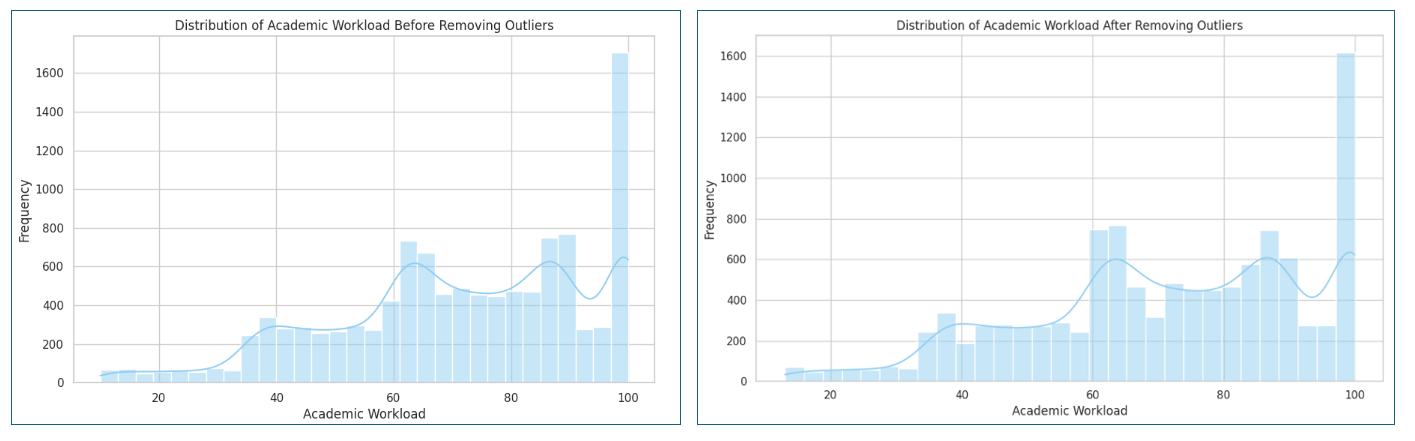

**Observations:**

 As seen above, removing the outliers made the distribution slightly more centralized. However, the distribution did not change significantly, as the high prevalence of workloads near the top end and the overall pattern **remained consistent**.

**Final Conclusions:**

Removing outliers has **minimal impact on correlations** with other variables, indicating that these values do **not** contribute significant patterns or relationships to the analysis. Furthermore, outliers **represent only 0.58% of the data** - a small fraction that does not compromise the integrity of the dataset or introduce bias.

Descriptive statistics confirm that removing these values results in only **slight changes** to the mean, median and standard deviation, with the overall shape of the **distribution remaining consistent**. This suggests that the **outliers probably represent noise** and not a specific group or a significant subset.

Given the small proportion, the minimal impact on correlations and the slight increase in centrality, it is “safe” to remove these outliers to improve the clarity and interpretability of the results. For these reasons, **the outliers will be removed**.


# Final Dataset

Once the missing values and outliers have been dealt with, we're going to restore some of the transformations carried out previously, in particular we're going to **restore the transformations from categorical to numerical variables** (i.e. we're going to put them back in their original nature - categorical).

The variables in question are: `degree_major`, `gender`, `sports_engagement`, `residential_status` and `average_sleep`.

In [139]:
final_dataset = handout.copy() # Handout = dataset with no outliers

**1.** `degree_major`

In [140]:
# REMOVE IF NECESSARY

degree_major_reverse_mapping = {
    1: 'Engineering',
    2: 'Data Science',
    3: 'Mathematics',
    4: 'Physics'
}

final_dataset['degree_major'] = final_dataset['degree_major'].map(degree_major_reverse_mapping)

**2.** `gender`

In [141]:
# REMOVE IF NECESSARY

gender_reverse_mapping = {
    1: 'Female',
    0: 'Male'
}

final_dataset['gender'] = final_dataset['gender'].replace(gender_reverse_mapping)

**3.** `sports_engagement`

In [142]:
# REMOVE IF NECESSARY

sports_engagement_reverse_mapping = {
    1: 'No Sports',
    2: '1-3 times',
    3: '4-6 times',
    4: '7+ times'
}

final_dataset['sports_engagement'] = final_dataset['sports_engagement'].map(sports_engagement_reverse_mapping)

**4.** `residential_status`

In [143]:
# REMOVE IF NECESSARY

residential_status_reverse_mapping = {
    1: 'On-Campus',
    0: 'Off-Campus'
}

final_dataset['residential_status'] = final_dataset['residential_status'].replace(residential_status_reverse_mapping)

**5.** `average_sleep`

In [144]:
# REMOVE IF NECESSARY

average_sleep_reverse_mapping = {
    1: '2-4 hrs',
    2: '4-6 hrs',
    3: '7-8 hrs'
}

final_dataset['average_sleep'] = final_dataset['average_sleep'].map(average_sleep_reverse_mapping)

In [145]:
#final_dataset['gender'] = final_dataset['gender'].replace({1: 'Female' , 0: 'Male'})

In [146]:
final_dataset.head(50)

gender   age  degree_major  academic_year  grade residential_status  \
id                                                                        
1     Male  21.0   Engineering            1.0   54.0         Off-Campus   
2     Male  20.0   Engineering            3.0   90.0          On-Campus   
3     Male  19.0  Data Science            1.0   79.0         Off-Campus   
4     Male  20.0  Data Science            3.0   88.0         Off-Campus   
5   Female  19.0  Data Science            1.0   76.0         Off-Campus   
6   Female  19.0  Data Science            1.0   65.0         Off-Campus   
7     Male  20.0  Data Science            1.0   81.0         Off-Campus   
8     Male  18.0  Data Science            1.0   66.0         Off-Campus   
9     Male  20.0   Engineering            4.0   94.0         Off-Campus   
11    Male  21.0   Engineering            3.0   74.0         Off-Campus   
12    Male  20.0   Engineering            3.0   73.0         Off-Campus   
13    Male  18.0  Data Science            1.0   65.0          On-Campus   
14    Male  20.0   Engineering            3.0   76.0         Off-Campus   
15    Male  18.0  Data Science            1.0   83.0         Off-Campus   
16    Male  21.0  Data Science            2.0   84.0         Off-Campus   
17  Female  17.0   Engineering            1.0   87.0          On-Campus   
18    Male  25.0  Data Science            4.0   92.0         Off-Campus   
19    Male  21.0  Data Science            2.0   69.0          On-Campus   
20    Male  17.0   Mathematics            1.0   50.0         Off-Campus   
21    Male  18.0  Data Science            1.0   55.0          On-Campus   
22    Male  20.0  Data Science            1.0   90.0         Off-Campus   
23    Male  21.0   Mathematics            4.0   79.0         Off-Campus   
24    Male  21.0   Engineering            3.0   66.0         Off-Campus   
25  Female  21.0   Engineering            3.0   80.0         Off-Campus   
26    Male  20.0  Data Science            1.0   50.0          On-Campus   
27    Male  17.0   Mathematics            1.0   50.0         Off-Campus   
28    Male  19.0   Engineering            3.0   66.0         Off-Campus   
29    Male  17.0  Data Science            1.0   85.0         Off-Campus   
30    Male  23.0  Data Science            2.0   66.0         Off-Campus   
31    Male  20.0  Data Science            1.0   50.0          On-Campus   
32    Male  22.0   Engineering            3.0   75.0         Off-Campus   
33    Male  19.0   Engineering            3.0   86.0         Off-Campus   
34  Female  20.0  Data Science            2.0   90.0          On-Campus   
35  Female  19.0   Engineering            3.0   81.0         Off-Campus   
36    Male  20.0   Engineering            3.0   85.0         Off-Campus   
37    Male  17.0  Data Science            1.0   81.0         Off-Campus   
38  Female  19.0  Data Science            1.0   79.0         Off-Campus   
39    Male  19.0   Mathematics            1.0   50.0         Off-Campus   
40  Female  22.0       Physics            4.0   91.0         Off-Campus   
41    Male  21.0   Mathematics            4.0   68.0         Off-Campus   
42    Male  20.0  Data Science            2.0   83.0          On-Campus   
43  Female  22.0   Mathematics            4.0   81.0         Off-Campus   
44  Female  22.0   Mathematics            4.0   92.0         Off-Campus   
45    Male  21.0   Engineering            3.0   69.0         Off-Campus   
46    Male  18.0   Engineering            1.0   64.0          On-Campus   
47    Male  20.0  Data Science            2.0   63.0         Off-Campus   
48    Male  20.0  Data Science            1.0   90.0         Off-Campus   
49  Female  19.0   Engineering            2.0   84.0         Off-Campus   
50    Male  17.0  Data Science            1.0   92.0         Off-Campus   
51    Male  20.0  Data Science            3.0   93.0         Off-Campus   

    campus_discrimination sports_engagement average_sleep  study_satisfaction  \
id                    

We are now replacing the seven variables used in PCA with the three resulting principal components in the dataframe

# Transformation

In [154]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11071 entries, 1 to 11336
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 11071 non-null  object 
 1   age                    11071 non-null  float64
 2   degree_major           11071 non-null  object 
 3   academic_year          11071 non-null  float64
 4   grade                  11071 non-null  float64
 5   residential_status     11071 non-null  object 
 6   campus_discrimination  11071 non-null  float64
 7   sports_engagement      11071 non-null  object 
 8   average_sleep          11071 non-null  object 
 9   study_satisfaction     11071 non-null  float64
 10  academic_workload      11071 non-null  float64
 11  academic_pressure      11071 non-null  float64
 12  financial_concerns     11071 non-null  float64
 13  social_relationships   11071 non-null  float64
 14  depression             11071 non-null  float64
 15  anxiety

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13048\802435056.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_df_transformed_inverse_sqrt[feat], color='blue', label='Original', shade=True, ax = ax)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13048\802435056.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_df_transformed_inverse_sqrt[feat], color='blue', label='Original', shade=True, ax = ax)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13048\802435056.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_df_transformed_inverse_sqrt[feat], color='blue', label='Original', shade=True

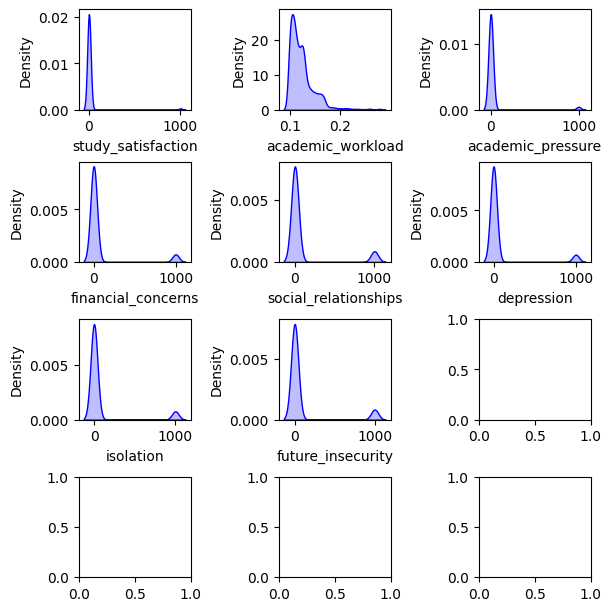

In [178]:
# Asegúrate de que no haya ceros o valores negativos
# Si tienes ceros o negativos, puedes añadir un pequeño valor para evitar la raíz de 0
numerical_df = final_dataset.loc[:, ['study_satisfaction', 'academic_workload', 'academic_pressure', 'financial_concerns', 'social_relationships', 'depression', 'isolation', 'future_insecurity']].copy()
numerical_df_transformed_inverse_sqrt = numerical_df + 1e-6  # Añadir un pequeño valor para evitar el 0

# Aplicar la transformación de raíz cuadrada inversa: 1/sqrt(x)
numerical_df_transformed_inverse_sqrt = 1 / np.sqrt(numerical_df_transformed_inverse_sqrt)

# Visualización con QQ plot para ver la transformación
fig, axes = plt.subplots(4, 3, figsize=(6, 6), constrained_layout=True)

for ax, feat in zip(axes.flatten(), numerical_df_transformed_inverse_sqrt.columns):
    sns.kdeplot(numerical_df_transformed_inverse_sqrt[feat], color='blue', label='Original', shade=True, ax = ax)

plt.show()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13048\892964511.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_df_transformed_yeo[feat], color='blue', label='Transformed', shade=True, ax=ax)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13048\892964511.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_df_transformed_yeo[feat], color='blue', label='Transformed', shade=True, ax=ax)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13048\892964511.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_df_transformed_yeo[feat], color='blue', label='Transformed', shade=True, ax=ax)
C:\Users\Gabr

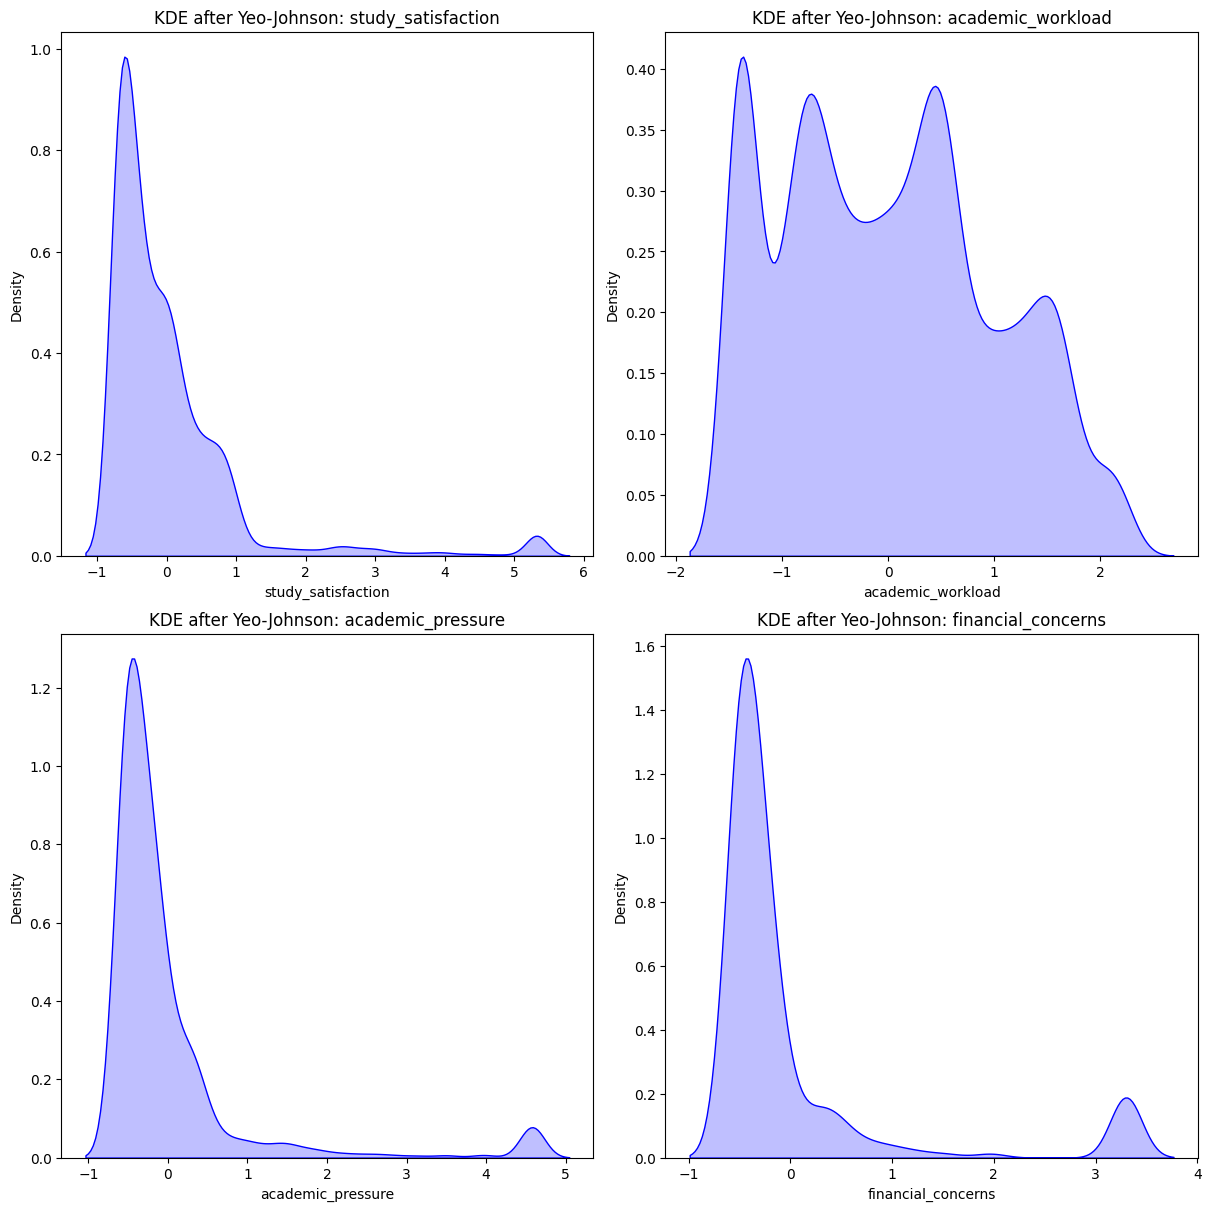

In [179]:
from sklearn.preprocessing import PowerTransformer

# Cálculo de la skewness
skewness_df = numerical_df_transformed_inverse_sqrt.copy()

# Aplicar Yeo-Johnson a las variables seleccionadas
transformer = PowerTransformer(method='yeo-johnson')
numerical_df_transformed_yeo = transformer.fit_transform(skewness_df)

# Crear un nuevo dataframe con las variables transformadas
numerical_df_transformed_yeo = pd.DataFrame(numerical_df_transformed_yeo, columns=skewness_df.columns)

# Crear subgráficos para visualizar las distribuciones
fig, axes = plt.subplots(2, 2, figsize=(12, 12), constrained_layout=True)

# Graficar las distribuciones antes y después de la transformación
for ax, feat in zip(axes.flatten(), numerical_df_transformed_yeo.columns):
     #Graficar el KDE para cada variable
    sns.kdeplot(numerical_df_transformed_yeo[feat], color='blue', label='Transformed', shade=True, ax=ax)
    ax.set_title(f'KDE after Yeo-Johnson: {feat}')

plt.show()



# Normalization

In [180]:
final_dataset_reduced.describe().T

count       mean        std        min        25%  \
age                    10810.0  19.948011   1.781391  17.000000  19.000000   
academic_year          10810.0   2.158002   1.070126   1.000000   1.000000   
grade                  10810.0  77.264385  12.157181  50.000000  70.000000   
campus_discrimination  10810.0   0.251989   0.434175   0.000000   0.000000   
study_satisfaction     10810.0  72.025513  24.822940   0.000000  56.000000   
social_relationships   10810.0  45.110638  28.804360   0.000000  19.000000   
sleep                  10810.0   0.230527   0.421190   0.000000   0.000000   
outdoor_activities     10810.0   0.218316   0.413122   0.000000   0.000000   
religious_activities   10810.0   0.527845   0.499247   0.000000   0.000000   
sports                 10810.0   0.680481   0.466312   0.000000   0.000000   
creative_activities    10810.0   0.115079   0.319132   0.000000   0.000000   
social_activities      10810.0   0.380019   0.485413   0.000000   0.000000   
online_entertainment   10810.0   0.426549   0.494598   0.000000   0.000000   
acdpsyc_wbeing         10810.0  -0.002563   1.853139  -4.829685  -1.314645   
acdpress_perconc       10810.0  -0.001504   1.035740  -2.572238  -0.732170   
financial_burden       10810.0   0.000406   0.921433  -2.470431  -0.706613   

                             50%        75%         max  
age                    20.000000  21.000000   26.000000  
academic_year           2.000000   3.000000    4.000000  
grade                  79.000000  87.000000   95.000000  
campus_discrimination   0.000000   1.000000    1.000000  
study_satisfaction     76.200000  94.000000  100.000000  
social_relationships   47.000000  64.000000  100.000000  
sleep                   0.000000   0.000000    1.000000  
outdoor_activities      0.000000   0.000000    1.000000  
religious_activities    1.000000   1.000000    1.000000  
sports                  1.000000   1.000000    1.000000  
creative_activities     0.000000   0.000000    1.000000  
social_activities       0.000000   1.000000    1.000000  
online_entertainment    0.000000   1.000000    1.000000  
acdpsyc_wbeing          0.026537   1.469908    3.477080  
acdpress_perconc       -0.071979   0.924614    2.428838  
financial_burden        0.072484   0.684746    2.024147

In [158]:
final_dataset_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10810 entries, 1 to 11070
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 10810 non-null  object 
 1   age                    10810 non-null  float64
 2   degree_major           10810 non-null  object 
 3   academic_year          10810 non-null  float64
 4   grade                  10810 non-null  float64
 5   residential_status     10810 non-null  object 
 6   campus_discrimination  10810 non-null  float64
 7   sports_engagement      10810 non-null  object 
 8   average_sleep          10810 non-null  object 
 9   study_satisfaction     10810 non-null  float64
 10  social_relationships   10810 non-null  float64
 11  sleep                  10810 non-null  float64
 12  outdoor_activities     10810 non-null  float64
 13  religious_activities   10810 non-null  float64
 14  sports                 10810 non-null  int64  
 15  creativ

**Observation:**

As we can see in the Statistical Descriptions Table (and as we have seen since the initial dataset), the variables **show some skewness**.

As such, **normalizing** the data is crucial to ensure a fair comparison between the features and improve the performance of the model to be developed in the next phase.

**Boolean** and **categorical** variables will **not** be included as they do not benefit from normalization.

Boolean variables are already binary, so they don't need adjustment. Categorical variables, on the other hand, represent different labels, not numerical relationships, so applying normalization makes no sense.

In addition, the variable `academic_year`, although represented in numbers, as it represents a label for each year ('1' for 1st year, '2' for 2nd year and so on), will **not** be included either.

In [182]:
#OJOOOOOO - CAMBIAR CONFIGURACIÓN FINAL_DATASET.COPY() POR FINAL_DATASET_REDUCED.COPY(). ESTOY HACIENDO UNA PRUEBA CON VARIABLES SIN REDUCIR

#columns_to_keep = ['study_satisfaction', 'academic_workload', 'academic_pressure', 'financial_concerns', 'social_relationships', 'depression', 'anxiety', 'isolation', 'future_insecurity']

#to_normalize= final_dataset.loc[:, columns_to_keep].copy()
to_normalize = numerical_df_transformed_yeo.copy()

to_normalize.head()

study_satisfaction  academic_workload  academic_pressure  \
0            2.777669          -0.742561          -0.570033   
1           -0.303144          -1.404224          -0.570033   
2            0.534198           1.249305          -0.270443   
3           -0.456587          -0.640732          -0.112964   
4           -0.702756           0.844048          -0.029011   

   financial_concerns  social_relationships  depression  isolation  \
0           -0.524458              0.080830   -0.559648  -0.545963   
1           -0.298990             -0.426434   -0.030096  -0.341444   
2           -0.511884             -0.392467   -0.546464  -0.534580   
3            0.510545              0.159363   -0.379804  -0.545963   
4           -0.453349             -0.441488    0.966059   0.799775   

   future_insecurity  
0          -0.565792  
1          -0.398954  
2           2.936389  
3          -0.277275  
4          -0.414886

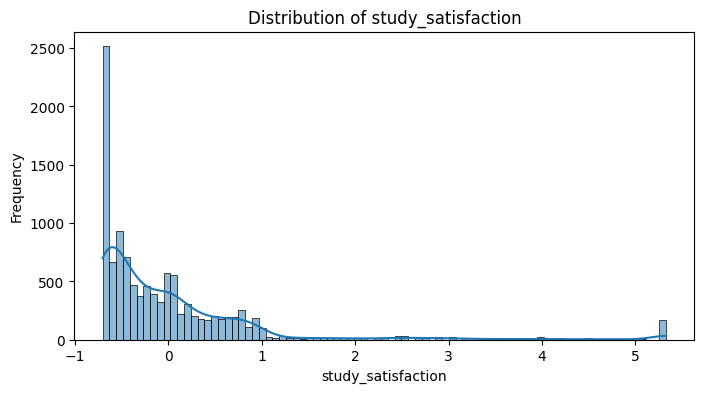

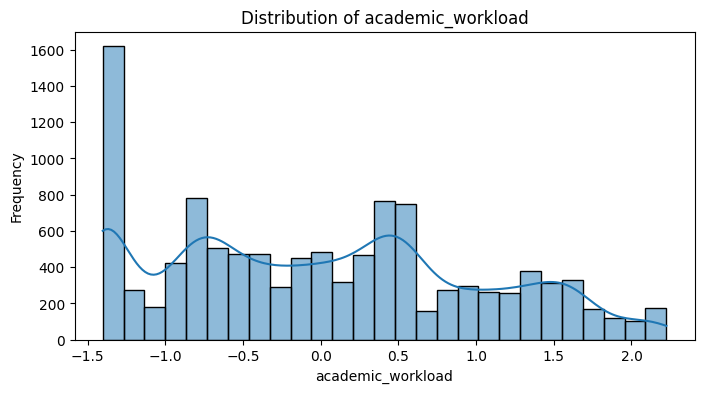

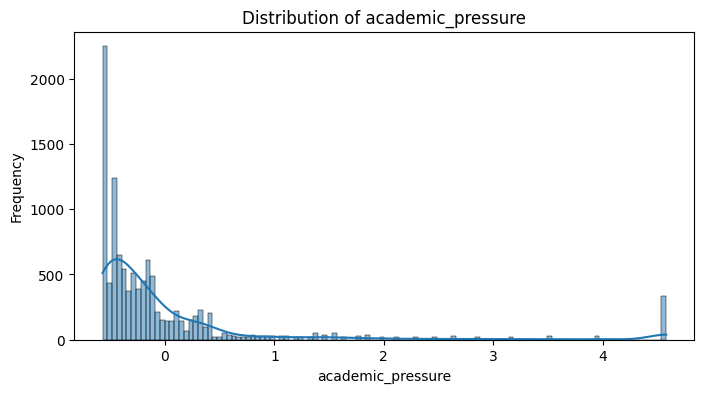

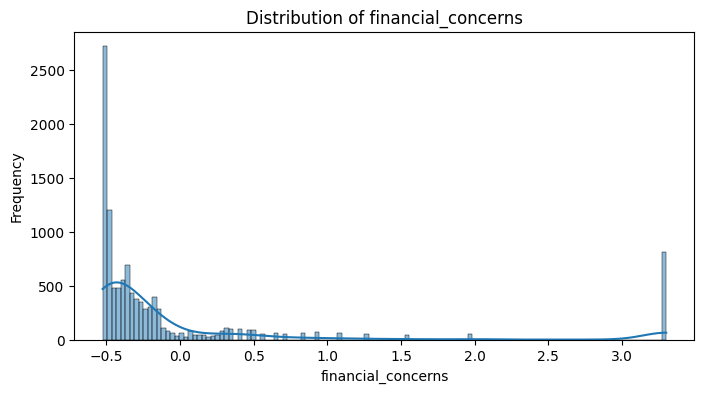

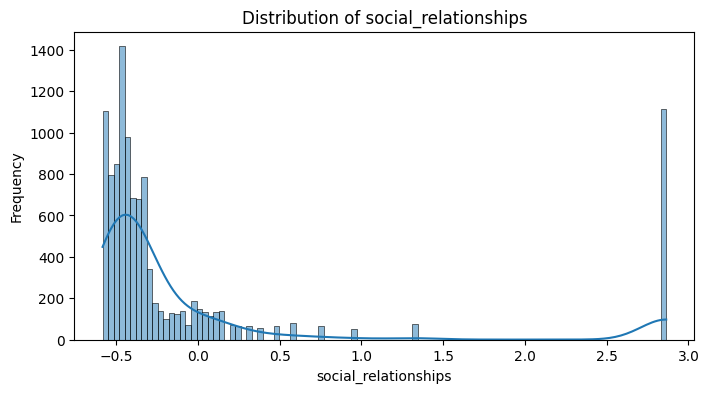

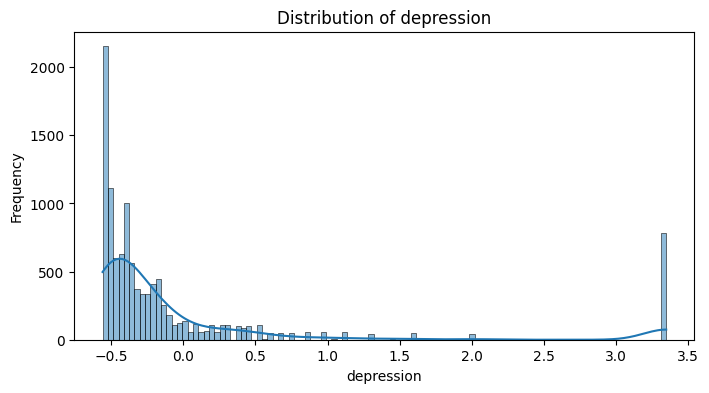

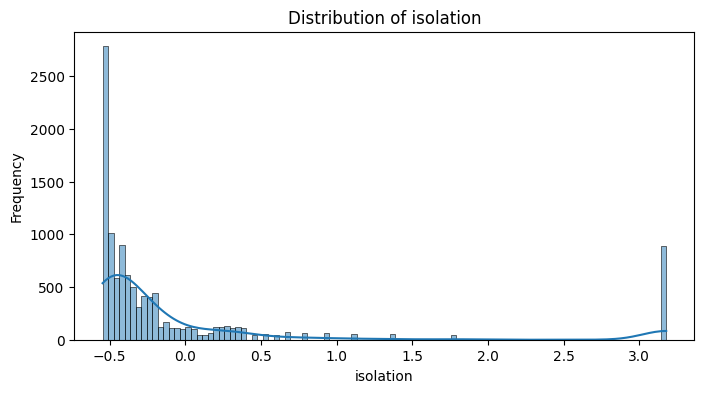

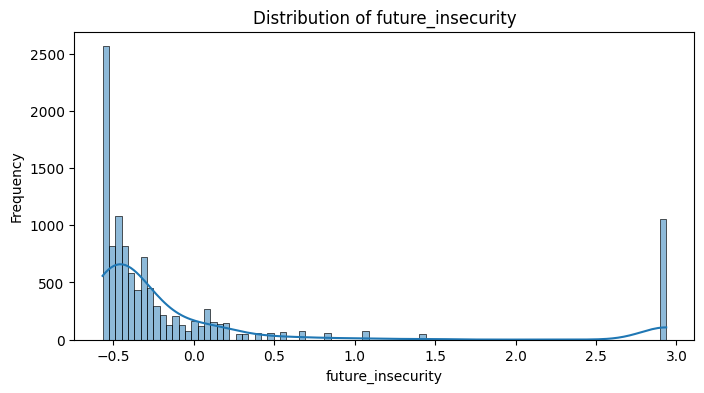

In [183]:
#@title Visualizing the distributions of the variables to be scaled

for c in to_normalize.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(to_normalize[c], kde=True)
    plt.title(f'Distribution of {c}')
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.show()

In [184]:
from sklearn.preprocessing import StandardScaler

final_dataset_normalized = to_normalize.copy()

**Observation:**

We opted for **Z-score normalization** to scale our data (𝜇 = 0, 𝜎 = 1) as it ensures consistency and comparability between different scales. Although Z-score normalization does **not** directly **address asymmetry**, this approach is appropriate because most variables have only a small asymmetry.

Thus, by using Z scores, we **preserve** the **original distributions** of the data, allowing any inherent asymmetry to remain - a choice made deliberately to retain potentially valuable information within the dataset. Altering the distributions to impose normality could cause insights linked to the natural variability of each variable to be lost.

However, should we find at the next stage, with the modeling and analysis of it, that the results were sub-optimal, we can always go back to the pre-processing stage and *refine* our approach as necessary.

In [178]:
# @title Z-Score Standardization
#scaler = StandardScaler()

#scaled_data = scaler.fit_transform(final_dataset_normalized)

#final_dataset_normalized = pd.DataFrame(scaled_data, columns=final_dataset_normalized.columns)


#final_dataset_normalized.describe().T

In [185]:
# @title RobustScaler
from sklearn.preprocessing import RobustScaler

# Inicializamos el RobustScaler
scaler = RobustScaler()

# Aplicamos la transformación a los datos
scaled_data = scaler.fit_transform(final_dataset_normalized)

# Convertimos el resultado en un DataFrame con las mismas columnas
final_dataset_normalized = pd.DataFrame(scaled_data, columns=final_dataset_normalized.columns)

# Mostramos las estadísticas descriptivas
final_dataset_normalized.describe().T

count      mean       std       min       25%  50%  \
study_satisfaction    11071.0  0.345561  1.222623 -0.513606 -0.400160  0.0   
academic_workload     11071.0  0.022229  0.666939 -0.914260 -0.540937  0.0   
academic_pressure     11071.0  0.631263  2.048712 -0.536518 -0.353897  0.0   
financial_concerns    11071.0  1.080225  2.914919 -0.448460 -0.352715  0.0   
social_relationships  11071.0  1.053039  2.642415 -0.489843 -0.217017  0.0   
depression            11071.0  0.903555  2.420417 -0.450965 -0.330642  0.0   
isolation             11071.0  0.955810  2.448615 -0.380982 -0.292250  0.0   
future_insecurity     11071.0  0.881479  2.274162 -0.405167 -0.292902  0.0   

                           75%        max  
study_satisfaction    0.599840   6.860397  
academic_workload     0.459063   1.505783  
academic_pressure     0.646103  10.013641  
financial_concerns    0.647285  10.698770  
social_relationships  0.782983   8.621761  
depression            0.669358   9.005821  
isolation             0.707750   8.737159  
future_insecurity     0.707098   7.559002

In [186]:
to_keep = ['age', 'campus_discrimination', 'academic_year', 'sleep', 'outdoor_activities', 'religious_activities', 'sports', 'creative_activities', 'social_activities', 'online_entertainment', 'gender', 'degree_major', 'residential_status', 'sports_engagement', 'average_sleep']
df_preprocessed = pd.merge(left=final_dataset[to_keep], right=final_dataset_normalized, left_index=True, right_index=True)
df_preprocessed.head()

age  campus_discrimination  academic_year  sleep  outdoor_activities  \
1  21.0                    1.0            1.0    0.0                 0.0   
2  20.0                    0.0            3.0    1.0                 0.0   
3  19.0                    0.0            1.0    0.0                 0.0   
4  20.0                    1.0            3.0    0.0                 0.0   
5  19.0                    1.0            1.0    0.0                 0.0   

   religious_activities  sports  creative_activities  social_activities  \
1                   0.0       0                  0.0                0.0   
2                   1.0       1                  0.0                1.0   
3                   1.0       1                  0.0                0.0   
4                   0.0       1                  0.0                0.0   
5                   1.0       1                  0.0                1.0   

   online_entertainment  ... sports_engagement average_sleep  \
1                   1.0  ...          7+ times       2-4 hrs   
2                   1.0  ...         No Sports       4-6 hrs   
3                   0.0  ...         No Sports       4-6 hrs   
4                   1.0  ...         No Sports       7-8 hrs   
5                   1.0  ...         No Sports       7-8 hrs   

  study_satisfaction academic_workload academic_pressure  financial_concerns  \
1          -0.025053         -0.914260         -0.536518            0.208732   
2           0.998654          0.855402          0.077229           -0.411808   
3          -0.212648         -0.405081          0.399843            2.568354   
4          -0.513606          0.585132          0.571831           -0.241192   
5           6.860397          0.427101         -0.252513           -0.299193   

   social_relationships  depression  isolation  future_insecurity  
1             -0.073726    0.830714   0.119784          -0.025765  
2              0.016025   -0.419056  -0.353110           7.559002  
3              1.474124   -0.015688  -0.380982           0.250939  
4             -0.113502    3.241716   2.914062          -0.061997  
5              1.474124   -0.321030  -0.267431          -0.319389  

[5 rows x 23 columns]

In [187]:
df_preprocessed.describe().T

count       mean       std        min        25%  \
age                    10810.0  19.948011  1.781391  17.000000  19.000000   
campus_discrimination  10810.0   0.251989  0.434175   0.000000   0.000000   
academic_year          10810.0   2.158002  1.070126   1.000000   1.000000   
sleep                  10810.0   0.230527  0.421190   0.000000   0.000000   
outdoor_activities     10810.0   0.218316  0.413122   0.000000   0.000000   
religious_activities   10810.0   0.527845  0.499247   0.000000   0.000000   
sports                 10810.0   0.680481  0.466312   0.000000   0.000000   
creative_activities    10810.0   0.115079  0.319132   0.000000   0.000000   
social_activities      10810.0   0.380019  0.485413   0.000000   0.000000   
online_entertainment   10810.0   0.426549  0.494598   0.000000   0.000000   
study_satisfaction     10810.0   0.346413  1.223586  -0.513606  -0.400160   
academic_workload      10810.0   0.023294  0.667371  -0.914260  -0.540937   
academic_pressure      10810.0   0.634248  2.053417  -0.536518  -0.353897   
financial_concerns     10810.0   1.078539  2.911077  -0.448460  -0.352715   
social_relationships   10810.0   1.059857  2.650708  -0.489843  -0.217017   
depression             10810.0   0.900510  2.415676  -0.450965  -0.321030   
isolation              10810.0   0.953149  2.445448  -0.380982  -0.290214   
future_insecurity      10810.0   0.884730  2.277618  -0.405167  -0.292902   

                             50%        75%        max  
age                    20.000000  21.000000  26.000000  
campus_discrimination   0.000000   1.000000   1.000000  
academic_year           2.000000   3.000000   4.000000  
sleep                   0.000000   0.000000   1.000000  
outdoor_activities      0.000000   0.000000   1.000000  
religious_activities    1.000000   1.000000   1.000000  
sports                  1.000000   1.000000   1.000000  
creative_activities     0.000000   0.000000   1.000000  
social_activities       0.000000   1.000000   1.000000  
online_entertainment    0.000000   1.000000   1.000000  
study_satisfaction      0.000000   0.599840   6.860397  
academic_workload       0.000000   0.459063   1.505783  
academic_pressure       0.000000   0.646103  10.013641  
financial_concerns      0.000000   0.647285  10.698770  
social_relationships    0.016025   0.782983   8.621761  
depression              0.000000   0.669358   9.005821  
isolation               0.000000   0.707750   8.737159  
future_insecurity       0.000000   0.707098   7.559002

In [188]:
df_preprocessed.to_csv("G:/Mi unidad/1. PROYECTOS/DM project/2nd delivery/df_preprocessed.csv")

In [189]:
df_preprocessed.head()

age  campus_discrimination  academic_year  sleep  outdoor_activities  \
1  21.0                    1.0            1.0    0.0                 0.0   
2  20.0                    0.0            3.0    1.0                 0.0   
3  19.0                    0.0            1.0    0.0                 0.0   
4  20.0                    1.0            3.0    0.0                 0.0   
5  19.0                    1.0            1.0    0.0                 0.0   

   religious_activities  sports  creative_activities  social_activities  \
1                   0.0       0                  0.0                0.0   
2                   1.0       1                  0.0                1.0   
3                   1.0       1                  0.0                0.0   
4                   0.0       1                  0.0                0.0   
5                   1.0       1                  0.0                1.0   

   online_entertainment  ... sports_engagement average_sleep  \
1                   1.0  ...          7+ times       2-4 hrs   
2                   1.0  ...         No Sports       4-6 hrs   
3                   0.0  ...         No Sports       4-6 hrs   
4                   1.0  ...         No Sports       7-8 hrs   
5                   1.0  ...         No Sports       7-8 hrs   

  study_satisfaction academic_workload academic_pressure  financial_concerns  \
1          -0.025053         -0.914260         -0.536518            0.208732   
2           0.998654          0.855402          0.077229           -0.411808   
3          -0.212648         -0.405081          0.399843            2.568354   
4          -0.513606          0.585132          0.571831           -0.241192   
5           6.860397          0.427101         -0.252513           -0.299193   

   social_relationships  depression  isolation  future_insecurity  
1             -0.073726    0.830714   0.119784          -0.025765  
2              0.016025   -0.419056  -0.353110           7.559002  
3              1.474124   -0.015688  -0.380982           0.250939  
4             -0.113502    3.241716   2.914062          -0.061997  
5              1.474124   -0.321030  -0.267431          -0.319389  

[5 rows x 23 columns]